# STINTSY S12 Group 2 - Major Course Output

**Members:**
* BONDOC, Alyana Erin
* GO, Eldrich Jadrian
* MARTINEZ, Kyle
* TO, Justin Jarrett

In [1]:
import pandas as pd
import sklearn.preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge

## Section 1: Introduction to the problem/task and dataset
Each group should select one real-world dataset from the list of datasets provided for the
project. Each dataset is accompanied with a description file, which also contains detailed
description of each feature.
The target task (i.e., classification or regression) should be properly stated as well.

The Garments industry is a highly labor-intensive industry. To satify the high global demands, the output of this industry is highly dependent on the production and delivery performance of the employees. Due to this, to better understand and improve the productivity of the manufacturing processes, it is important that we analyze the process and performance of the workers to be able to predict actual productivity outputed by the workers in the process. The Garments dataset includes attributes related to the garments industry.

With this dataset, we aim to conduct regression analysis to predict the actual productivity of workers given the data. An overview for how much each attribute affects the actual productivity will further be explored. This notebook will serve as a documentaion for how we processed the data to create different models to predict the actual productivity and better understand the features of the data.

## Section 2: Description of the dataset

In this section of the notebook, you must fulfill the following:
- State a brief description of the dataset.
- Provide a description of the collection process executed to build the dataset. Discuss the implications of the data collection method on the generated conclusions and insights. Note that you may need to look at relevant sources related to the dataset to acquire necessary information for this part of the project.
- Describe the structure of the dataset file.
  - What does each row and column represent?
  - How many instances are there in the dataset?
  - How many features are there in the dataset?
  - If the dataset is composed of different files that you will combine in the succeeding steps, describe the structure and the contents of each file.
- Discuss the features in each dataset file. What does each feature represent? All features, even those which are not used for the study, should be described to the reader. The purpose of each feature in the dataset should be clear to the reader of the notebook without having to go through an external link.


### Garments Dataset
The Garment data set includes important attributes of the garment manufacturing process such as the productivity of the workers, which was manually gathered and confirmed by the industry insiders. The data was extracted by Rahim et al. (2021) using advanced data mining techniques such as the tree ensemble model and gradient boosted tree model.

A tree ensemble is a machine learning model which makes predictions by utilizing several decision trees as opposed to just one. On the other hand, a Gradient Boosted Tree model is an ensemble learning technique wherein new models are built to predict the errors or residuals of previous models, which are then combined to produce the final prediction.Tree models are susceptible to overfitting, capturing noise or patterns specific to the training data that may not generalize well to new data. As a result, predicted values may be very specific to the data used in the process. Although these models can create complex relationships and accurate predictions, it may also result in models that are challenging to interpret.

In [2]:
df = pd.read_csv('garments.csv')

In [3]:
print(df.head())

       date   quarter  department       day  team  targeted_productivity  \
0  1/1/2015  Quarter1      sweing  Thursday     8                   0.80   
1  1/1/2015  Quarter1  finishing   Thursday     1                   0.75   
2  1/1/2015  Quarter1      sweing  Thursday    11                   0.80   
3  1/1/2015  Quarter1      sweing  Thursday    12                   0.80   
4  1/1/2015  Quarter1      sweing  Thursday     6                   0.80   

     smv     wip  over_time  incentive  idle_time  idle_men  \
0  26.16  1108.0       7080         98        0.0         0   
1   3.94     NaN        960          0        0.0         0   
2  11.41   968.0       3660         50        0.0         0   
3  11.41   968.0       3660         50        0.0         0   
4  25.90  1170.0       1920         50        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity  
0                   0           59.0             0.940725  
1                   0            8.0        

In [4]:
print(df['day'].unique())

['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']


The dataset consists of 1197 rows which represent the number of entries or instances, and 15 columns which represent the 15 features of the entry.
The 15 features are:
- date
>  Date in MM-DD-YYYY
- quarter
> A portion of the month. A month was divided into four quarters.
- department
> Department associated with the instance.
- day
> Day of the week
- team
> Team number associated with the instance.
- targeted_productivity
> Targeted productivity set by the authority for each team for each
da
- smv
> Standard Minute Value; the allocated time for a task
- wip
> Work in progress. Includes the number of unfinished items for products.
- over_time
> Represents the amount of overtime by each team in minutes.
- incentive
> Represents the amount of financial incentive that enables or motivates a
particular course of action
- idle_time
> The amount of time when the production was interrupted due to several
reasons
- idle_men
> The number of workers who were idle due to production interruption.
- no_of_style_change
> Number of changes in the style of a particular product
- no_of_workers
> Number of workers in each team
- actual_productivity
> The actual % of productivity that was delivered by the workers. It
ranges from 0-1.

## Section 3: List of requirements
List all the Python libraries and modules that you used.

In [5]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.preprocessing
import torch
import torch.nn as nn
import torch.optim as optim
from random import uniform, randint
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

## Section 4: Data preprocessing and cleaning
Perform the necessary steps before using the data. In this section of the notebook, please take note of the following:
- If needed, perform preprocessing techniques to transform the data to the appropriate representation. This may include binning, log transformations, conversion to one-hot encoding, normalization, standardization, interpolation, truncation, and feature engineering, among others. There should be a correct and proper justification of the use of each preprocessing technique used in the project.
- Make sure that the data is clean, especially features that are used in the project. This may include checking for misrepresentations, checking the data type, dealing with missing data, dealing with duplicate data, and dealing with outliers, among others. There should be a correct and proper justification of the application (or non-application) of each data cleaning method used in the project. Clean only the variables utilized in the study.

Before we do any machine learning, we need to prepare our data and ensure that it is as clean as possible to improve our model's accuracy.

### Data Cleaning

This includes handling missing values, dealing with outliers, and transforming variables as necessary. Data cleaning is a critical step in ensuring the quality of the data before it is used for analysis or model building.

In [6]:
null_count = df.isnull().sum()
print(null_count)

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64


As you can see from the display above, most columns do not contain a null value, with the only exception being the column **wip**. To counter this, we will be using a SimpleImputer from the sklearn library with a mean strategy. The SimpleImputer class is used for handling missing values in datasets, which is a common issue in real-world data.

In [7]:

imputer_num = SimpleImputer(strategy='mean')

imputer_num is an instance of SimpleImputer that is set up to replace missing values with the mean value of the respective column. This is a common strategy for numerical data as it allows you to fill in the missing values with a central tendency measure that is calculated from the available values, thus maintaining the distribution of the data as much as possible.

Once you have created the SimpleImputer instance, you would typically use the fit method to compute the mean of each column and then the transform method to replace missing values. Alternatively, you can use fit_transform to do both steps at once.

In [8]:
df['wip'] = imputer_num.fit_transform(df[['wip']])

In [9]:
df.isnull().values.any()

False

After using the SimpleImputer, there are now 0 null values in the dataset

Next, let's check for duplicate entries.

In [10]:
duplicate_rows = df.duplicated().sum()
duplicate_rows

0

Next, let's look for misrepresented data or noise that could be a result of typos, input error, data leakage, etc.

In [11]:
print(df['department'].unique())

['sweing' 'finishing ' 'finishing']


In the department column, there are two different column values for finishing, one suffixed with an empty space and one without; and sewing is mispelled to sweing.

In [12]:
df['department'] = df['department'].replace('finishing ', 'finishing')
df['department'] = df['department'].replace('sweing', 'sewing')

In [13]:
print(df['department'].unique())

['sewing' 'finishing']


Next, let's take a look at the data types of our features.

In [14]:
df.dtypes

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

Since no_of_workers is found to be a float type, let's correct it to an integer type.

In [15]:
df['no_of_workers'] = df['no_of_workers'].astype(int)
df.dtypes

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers              int64
actual_productivity      float64
dtype: object

In [16]:
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sewing,Thursday,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,1190.465991,960,0,0.0,0,0,8,0.886500
2,1/1/2015,Quarter1,sewing,Thursday,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30,0.800570
3,1/1/2015,Quarter1,sewing,Thursday,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30,0.800570
4,1/1/2015,Quarter1,sewing,Thursday,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,1190.465991,960,0,0.0,0,0,8,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,1190.465991,960,0,0.0,0,0,8,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,1190.465991,960,0,0.0,0,0,8,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,1190.465991,1800,0,0.0,0,0,15,0.505889


In [17]:
df['productivity_ratio'] = df['actual_productivity'] / df['targeted_productivity']

Let us continue to clean the data by dealing with its outliers. Let's plot a vertical boxplot to identify which features have visible outliers.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'team'),
  Text(1, 0, 'targeted_productivity'),
  Text(2, 0, 'smv'),
  Text(3, 0, 'wip'),
  Text(4, 0, 'over_time'),
  Text(5, 0, 'incentive'),
  Text(6, 0, 'idle_time'),
  Text(7, 0, 'idle_men'),
  Text(8, 0, 'no_of_style_change'),
  Text(9, 0, 'no_of_workers'),
  Text(10, 0, 'actual_productivity'),
  Text(11, 0, 'productivity_ratio')])

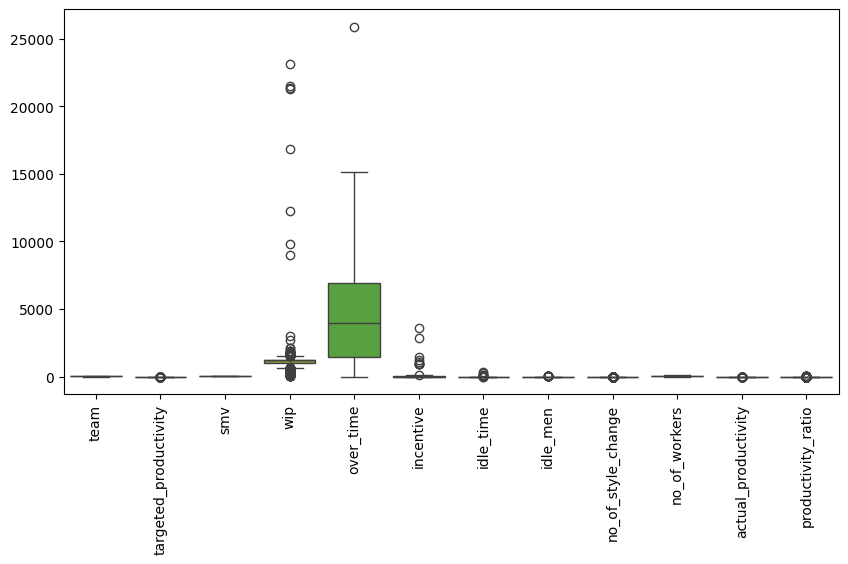

In [18]:
plt.figure(figsize=(10,5))
p = sns.boxplot(data = df, orient ='v',width=0.8)
plt.xticks(rotation=90)

Observing the boxplot, we can see that features wip, over_time, incentive, idle_time, and idle_men have some concerning outliers. To better understand the impact of the features' outliers and the symmetry distribution, we check the skewness of the data.

In [19]:
skewness_wip = df['wip'].skew()
skewness_over_time = df['over_time'].skew()
skewness_incentive = df['incentive'].skew()
skewness_idle_time = df['idle_time'].skew()
skewness_idle_men = df['idle_men'].skew()

print("Skewness(wip):", skewness_wip)
print("Skewness(over_time):", skewness_over_time)
print("Skewness(incentive):", skewness_incentive)
print("Skewness(idle_time):", skewness_idle_time)
print("Skewness(idle_men):", skewness_idle_men)

Skewness(wip): 12.809938992672853
Skewness(over_time): 0.6732872952976457
Skewness(incentive): 15.790746016958247
Skewness(idle_time): 20.545425229670172
Skewness(idle_men): 9.855079123524012


It shows that features wip, incentive, idle_time, and idle_men are largely positively skewed. We can reduce the impact of it by applying log transformations. With log1p, this can sometimes reduce the impact of outliers and avoid issues with data containing zeros.

In [20]:
df['wip'] = df['wip'].apply(lambda x: np.log1p(x) if x > 0 else 0)
df['incentive'] = df['incentive'].apply(lambda x: np.log1p(x) if x > 0 else 0)
df['idle_time'] = df['idle_time'].apply(lambda x: np.log1p(x) if x > 0 else 0)
df['idle_men'] = df['idle_men'].apply(lambda x: np.log1p(x) if x > 0 else 0)

### Convert Categorical Data

#### Binning

For features with a wide range of values, think about categorizing them into bins. Take the over_time feature, for instance—it could be divided into three categories: no overtime, low overtime, and high overtime. In this setup, low overtime would encompass values below the mean overtime, while high overtime would include values surpassing the mean.

In [21]:
mean_overtime = df['over_time'].mean()
mean_overtime

4567.460317460317

In [22]:
bins = [-float('inf'), 0, mean_overtime, float('inf')]
labels = ['no_overtime', 'low_overtime', 'high_overtime']

df['over_time_category'] = pd.cut(df['over_time'], bins=bins, labels=labels, include_lowest=True)

In [23]:

df['over_time_category'].unique()

['high_overtime', 'low_overtime', 'no_overtime']
Categories (3, object): ['no_overtime' < 'low_overtime' < 'high_overtime']

In [24]:
sample_per_category = df.groupby('over_time_category').head(1)
print(sample_per_category[['over_time', 'over_time_category']])

     over_time over_time_category
0         7080      high_overtime
1          960       low_overtime
684          0        no_overtime


#### One-Hot Encoding

We will apply one hot encoding to over_time_category so that it can be provided to machine learning algorithms.

In [25]:

one_hot_encoder_ot = sklearn.preprocessing.OneHotEncoder(dtype='int8')

In [26]:
one_hot_encoder_ot.fit(df['over_time_category'].values.reshape(-1, 1))

OneHotEncoder(dtype='int8')

Display the categories.

In [27]:
one_hot_encoder_ot.categories_

[array(['high_overtime', 'low_overtime', 'no_overtime'], dtype=object)]

The encoding will then be an array with 3 columns, where the columns represents:

- column 1 - no_overtime
- column 2 - low_overtime
- column 3 - high_overtime

Transform the department feature by calling the transform() function of the object.

In [28]:
encoding = one_hot_encoder_ot.transform(df['over_time_category'].values.reshape(-1, 1)).toarray()
encoding

array([[1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]], dtype=int8)

In [29]:
ot_df = pd.DataFrame(encoding, columns=[x for x in one_hot_encoder_ot.categories_])
ot_df

,high_overtime,low_overtime,no_overtime
0,1,0,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1192,0,1,0
1193,0,1,0
1194,0,1,0
1195,0,1,0


Concatenate the encoding to the original DataFrame.

In [30]:
df = pd.concat([df, ot_df], axis=1)

In [31]:
df.rename(columns={('no_overtime',): 'no_overtime',
                   ('low_overtime',): 'low_overtime',
                   ('high_overtime',): 'high_overtime'}, inplace=True)

df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,productivity_ratio,over_time_category,high_overtime,low_overtime,no_overtime
0,1/1/2015,Quarter1,sewing,Thursday,8,0.80,26.16,7.011214,7080,4.595120,0.0,0.0,0,59,0.940725,1.175907,high_overtime,1,0,0
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,7.082940,960,0.000000,0.0,0.0,0,8,0.886500,1.182000,low_overtime,0,1,0
2,1/1/2015,Quarter1,sewing,Thursday,11,0.80,11.41,6.876265,3660,3.931826,0.0,0.0,0,30,0.800570,1.000713,low_overtime,0,1,0
3,1/1/2015,Quarter1,sewing,Thursday,12,0.80,11.41,6.876265,3660,3.931826,0.0,0.0,0,30,0.800570,1.000713,low_overtime,0,1,0
4,1/1/2015,Quarter1,sewing,Thursday,6,0.80,25.90,7.065613,1920,3.931826,0.0,0.0,0,56,0.800382,1.000477,low_overtime,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,7.082940,960,0.000000,0.0,0.0,0,8,0.628333,0.837778,low_overtime,0,1,0
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,7.082940,960,0.000000,0.0,0.0,0,8,0.625625,0.893750,low_overtime,0,1,0
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,7.082940,960,0.000000,0.0,0.0,0,8,0.625625,0.962500,low_overtime,0,1,0
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,7.082940,1800,0.000000,0.0,0.0,0,15,0.505889,0.674519,low_overtime,0,1,0


Next, we will also apply one hot encoding to department.

In [32]:

one_hot_encoder_dep = sklearn.preprocessing.OneHotEncoder(dtype='int8')

In [33]:
one_hot_encoder_dep.fit(df['department'].values.reshape(-1, 1))

OneHotEncoder(dtype='int8')

Display the categories.

In [34]:

one_hot_encoder_dep.categories_

[array(['finishing', 'sewing'], dtype=object)]

The encoding will then be an array with 2 columns, where the columns represents:

- column 1 - finishing
- column 2 - sewing

Transform the department feature by calling the transform() function of the object.

In [35]:
encoding = one_hot_encoder_dep.transform(df['department'].values.reshape(-1, 1)).toarray()
encoding

array([[0, 1],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=int8)

In [36]:
dep_df = pd.DataFrame(encoding, columns=['department_' + x for x in one_hot_encoder_dep.categories_])
dep_df

,department_finishing,department_sewing
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
1192,1,0
1193,1,0
1194,1,0
1195,1,0


Concatenate the encoding to the original DataFrame.

In [37]:

df = pd.concat([df, dep_df], axis=1)

In [38]:
df.rename(columns={('department_finishing',): 'department_finishing',
                   ('department_sewing',): 'department_sewing'}, inplace=True)

df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,...,no_of_style_change,no_of_workers,actual_productivity,productivity_ratio,over_time_category,high_overtime,low_overtime,no_overtime,department_finishing,department_sewing
0,1/1/2015,Quarter1,sewing,Thursday,8,0.80,26.16,7.011214,7080,4.595120,...,0,59,0.940725,1.175907,high_overtime,1,0,0,0,1
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,7.082940,960,0.000000,...,0,8,0.886500,1.182000,low_overtime,0,1,0,1,0
2,1/1/2015,Quarter1,sewing,Thursday,11,0.80,11.41,6.876265,3660,3.931826,...,0,30,0.800570,1.000713,low_overtime,0,1,0,0,1
3,1/1/2015,Quarter1,sewing,Thursday,12,0.80,11.41,6.876265,3660,3.931826,...,0,30,0.800570,1.000713,low_overtime,0,1,0,0,1
4,1/1/2015,Quarter1,sewing,Thursday,6,0.80,25.90,7.065613,1920,3.931826,...,0,56,0.800382,1.000477,low_overtime,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,7.082940,960,0.000000,...,0,8,0.628333,0.837778,low_overtime,0,1,0,1,0
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,7.082940,960,0.000000,...,0,8,0.625625,0.893750,low_overtime,0,1,0,1,0
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,7.082940,960,0.000000,...,0,8,0.625625,0.962500,low_overtime,0,1,0,1,0
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,7.082940,1800,0.000000,...,0,15,0.505889,0.674519,low_overtime,0,1,0,1,0


#### Ordinal Encoding

Ordinal encoding is a type of label encoding where there is an order associated with the data. In the dataset, the day feature is ordinal.

Let's create a dictionary that will map string values in the day feature to its corresponding integer value according to its order in a week. See list below:

- Sunday - 0
- Monday - 1
- Tuesday - 2
- Wednesday - 3
- Thursday - 4
- Friday - 5 (not in the dataset)
- Saturday - 6

In [39]:
df['day'].unique()

array(['Thursday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
      dtype=object)

In [40]:
days_dict= {
    'Sunday' : 0,
    'Monday' : 1,
    'Tuesday' : 2,
    'Wednesday' : 3,
    'Thursday' : 4,
    'Friday': 5,
    'Saturday': 6
}


Use the map() function to transform the day feature to its corresponding ordinal value.

In [41]:
df['day'] = df['day'].map(days_dict)
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,...,no_of_style_change,no_of_workers,actual_productivity,productivity_ratio,over_time_category,high_overtime,low_overtime,no_overtime,department_finishing,department_sewing
0,1/1/2015,Quarter1,sewing,4,8,0.80,26.16,7.011214,7080,4.595120,...,0,59,0.940725,1.175907,high_overtime,1,0,0,0,1
1,1/1/2015,Quarter1,finishing,4,1,0.75,3.94,7.082940,960,0.000000,...,0,8,0.886500,1.182000,low_overtime,0,1,0,1,0
2,1/1/2015,Quarter1,sewing,4,11,0.80,11.41,6.876265,3660,3.931826,...,0,30,0.800570,1.000713,low_overtime,0,1,0,0,1
3,1/1/2015,Quarter1,sewing,4,12,0.80,11.41,6.876265,3660,3.931826,...,0,30,0.800570,1.000713,low_overtime,0,1,0,0,1
4,1/1/2015,Quarter1,sewing,4,6,0.80,25.90,7.065613,1920,3.931826,...,0,56,0.800382,1.000477,low_overtime,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,3,10,0.75,2.90,7.082940,960,0.000000,...,0,8,0.628333,0.837778,low_overtime,0,1,0,1,0
1193,3/11/2015,Quarter2,finishing,3,8,0.70,3.90,7.082940,960,0.000000,...,0,8,0.625625,0.893750,low_overtime,0,1,0,1,0
1194,3/11/2015,Quarter2,finishing,3,7,0.65,3.90,7.082940,960,0.000000,...,0,8,0.625625,0.962500,low_overtime,0,1,0,1,0
1195,3/11/2015,Quarter2,finishing,3,9,0.75,2.90,7.082940,1800,0.000000,...,0,15,0.505889,0.674519,low_overtime,0,1,0,1,0


Next, let's take a look at quarter.

In [42]:
df['quarter'].unique()

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype=object)

It's seems that there are 5 quarters in the dataset, contrary to the dataset's description saying that there are only 4.

Let's take a look on how the quarters are categorized per month and year.

In [43]:
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [44]:
df = df.sort_values(by=['year', 'month', 'date'])
grouped = df.groupby(['month', 'year', 'quarter'])
first_instances = grouped.first()
first_instances.reset_index(inplace=True)
first_instances = first_instances[['date', 'month', 'year', 'quarter']]
first_instances

,date,month,year,quarter
0,2015-01-01,1,2015,Quarter1
1,2015-01-08,1,2015,Quarter2
2,2015-01-15,1,2015,Quarter3
3,2015-01-22,1,2015,Quarter4
4,2015-01-29,1,2015,Quarter5
5,2015-02-01,2,2015,Quarter1
6,2015-02-08,2,2015,Quarter2
7,2015-02-15,2,2015,Quarter3
8,2015-02-22,2,2015,Quarter4
9,2015-03-01,3,2015,Quarter1


Analyzing the results, it becomes evident that the quarter signifies the particular week within a month. Hence, the variation in the number of weeks, with some months containing 4 weeks and others featuring 5.

With this, let's create a dictionary that will map string values in the quarter feature to its corresponding integer value according to its number. See list below:

- Quarter1 - 1
- Quarter2 - 2
- Quarter3 - 3
- Quarter4 - 4
- Quarter5 - 5

In [45]:
quarter_dict= {
    'Quarter1' : 1,
    'Quarter2' : 2,
    'Quarter3' : 3,
    'Quarter4' : 4,
    'Quarter5' : 5
}

In [46]:
df['quarter'] = df['quarter'].map(quarter_dict)
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,...,actual_productivity,productivity_ratio,over_time_category,high_overtime,low_overtime,no_overtime,department_finishing,department_sewing,month,year
0,2015-01-01,1,sewing,4,8,0.80,26.16,7.011214,7080,4.595120,...,0.940725,1.175907,high_overtime,1,0,0,0,1,1,2015
1,2015-01-01,1,finishing,4,1,0.75,3.94,7.082940,960,0.000000,...,0.886500,1.182000,low_overtime,0,1,0,1,0,1,2015
2,2015-01-01,1,sewing,4,11,0.80,11.41,6.876265,3660,3.931826,...,0.800570,1.000713,low_overtime,0,1,0,0,1,1,2015
3,2015-01-01,1,sewing,4,12,0.80,11.41,6.876265,3660,3.931826,...,0.800570,1.000713,low_overtime,0,1,0,0,1,1,2015
4,2015-01-01,1,sewing,4,6,0.80,25.90,7.065613,1920,3.931826,...,0.800382,1.000477,low_overtime,0,1,0,0,1,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2015-03-11,2,finishing,3,10,0.75,2.90,7.082940,960,0.000000,...,0.628333,0.837778,low_overtime,0,1,0,1,0,3,2015
1193,2015-03-11,2,finishing,3,8,0.70,3.90,7.082940,960,0.000000,...,0.625625,0.893750,low_overtime,0,1,0,1,0,3,2015
1194,2015-03-11,2,finishing,3,7,0.65,3.90,7.082940,960,0.000000,...,0.625625,0.962500,low_overtime,0,1,0,1,0,3,2015
1195,2015-03-11,2,finishing,3,9,0.75,2.90,7.082940,1800,0.000000,...,0.505889,0.674519,low_overtime,0,1,0,1,0,3,2015


In [47]:
df.dtypes

date                     datetime64[ns]
quarter                           int64
department                       object
day                               int64
team                              int64
targeted_productivity           float64
smv                             float64
wip                             float64
over_time                         int64
incentive                       float64
idle_time                       float64
idle_men                        float64
no_of_style_change                int64
no_of_workers                     int64
actual_productivity             float64
productivity_ratio              float64
over_time_category             category
high_overtime                      int8
low_overtime                       int8
no_overtime                        int8
department_finishing               int8
department_sewing                  int8
month                             int64
year                              int64
dtype: object

### Normalization

Now looking at normalization.

In [48]:
scaler = MinMaxScaler()

normalized_features = ['wip', 'incentive', 'idle_time']
df[[f'{feature}_normalized' for feature in normalized_features]] = scaler.fit_transform(df[normalized_features])
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,...,high_overtime,low_overtime,no_overtime,department_finishing,department_sewing,month,year,wip_normalized,incentive_normalized,idle_time_normalized
0,2015-01-01,1,sewing,4,8,0.80,26.16,7.011214,7080,4.595120,...,1,0,0,0,1,1,2015,0.618859,0.561135,0.0
1,2015-01-01,1,finishing,4,1,0.75,3.94,7.082940,960,0.000000,...,0,1,0,1,0,1,2015,0.627859,0.000000,0.0
2,2015-01-01,1,sewing,4,11,0.80,11.41,6.876265,3660,3.931826,...,0,1,0,0,1,1,2015,0.601925,0.480137,0.0
3,2015-01-01,1,sewing,4,12,0.80,11.41,6.876265,3660,3.931826,...,0,1,0,0,1,1,2015,0.601925,0.480137,0.0
4,2015-01-01,1,sewing,4,6,0.80,25.90,7.065613,1920,3.931826,...,0,1,0,0,1,1,2015,0.625685,0.480137,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2015-03-11,2,finishing,3,10,0.75,2.90,7.082940,960,0.000000,...,0,1,0,1,0,3,2015,0.627859,0.000000,0.0
1193,2015-03-11,2,finishing,3,8,0.70,3.90,7.082940,960,0.000000,...,0,1,0,1,0,3,2015,0.627859,0.000000,0.0
1194,2015-03-11,2,finishing,3,7,0.65,3.90,7.082940,960,0.000000,...,0,1,0,1,0,3,2015,0.627859,0.000000,0.0
1195,2015-03-11,2,finishing,3,9,0.75,2.90,7.082940,1800,0.000000,...,0,1,0,1,0,3,2015,0.627859,0.000000,0.0


## Section 5: Exploratory data analysis
Perform exploratory data analysis comprehensively to gain a good understanding of your dataset.
In this section of the notebook, you must present relevant numerical summaries and
visualizations. Make sure that each code is accompanied by a brief explanation. The whole
process should be supported with verbose textual descriptions of your procedures and findings.

Since the goal of this study is to analyze, predict, and possibly maximize productivity, let us first take a closer look at the different facts about the recorded productivity given the current dataset.

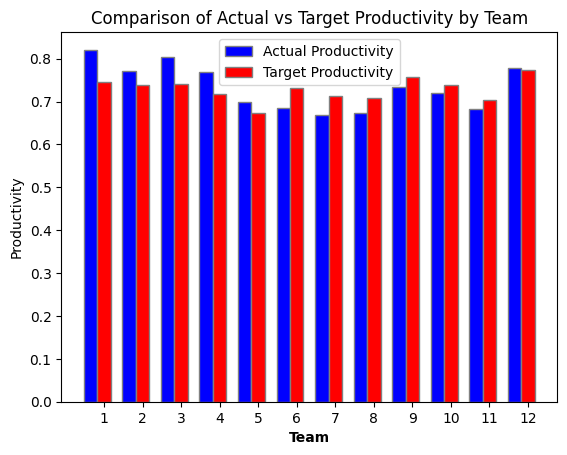

In [49]:
team_productivity = df.groupby('team').agg({
    'actual_productivity': 'mean',
    'targeted_productivity': 'mean',
    'no_of_style_change' : 'mean',
    'idle_time' : 'mean'
}).reset_index()
bar_width = 0.35
r1 = range(len(team_productivity))
r2 = [x + bar_width for x in r1]
plt.bar(r1, team_productivity['actual_productivity'], color='b', width=bar_width, edgecolor='grey', label='Actual Productivity')
plt.bar(r2, team_productivity['targeted_productivity'], color='r', width=bar_width, edgecolor='grey', label='Target Productivity')

# Adding labels and title
plt.xlabel('Team', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(team_productivity))], team_productivity['team'])
plt.ylabel('Productivity')
plt.title('Comparison of Actual vs Target Productivity by Team')

# Creating legend & showing graphic
plt.legend()
plt.show()

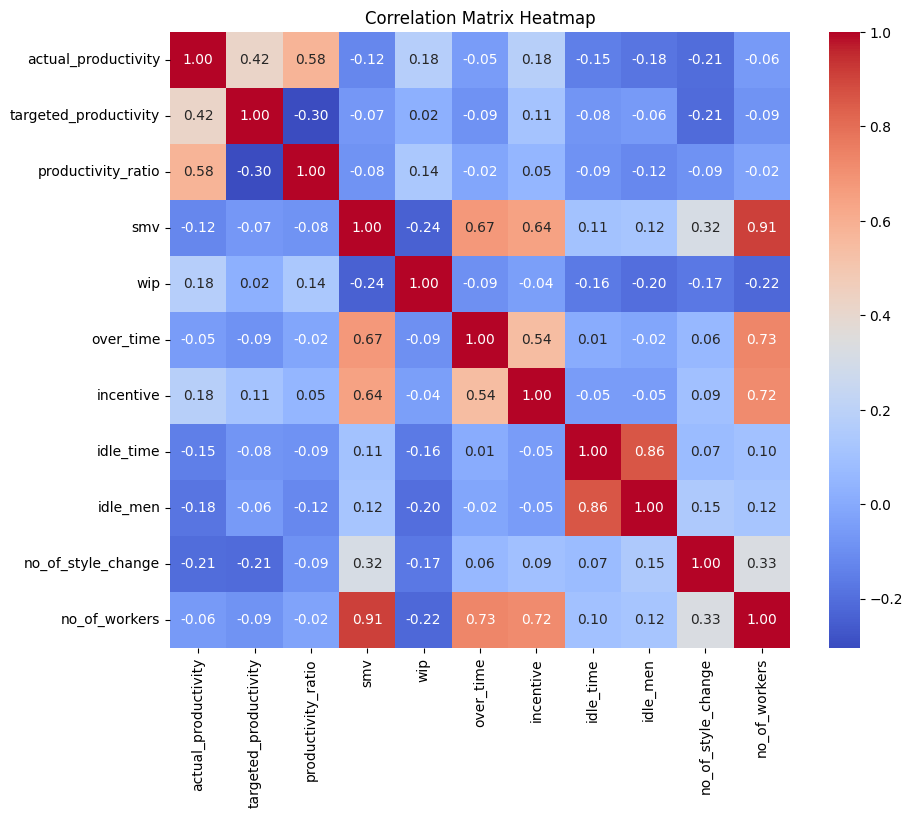

In [50]:
correlation_matrix = df[['actual_productivity', 'targeted_productivity', 'productivity_ratio','smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers']].corr()
# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

Here we can see a correlation map between all the different features in the dataset. It is noticable that the correlation values between the different features and the **actual_productivity** seem to be quite low which makes it quite difficult in terms of analysis. However there are a couple of interesting takeaways from the heat map above. One of which is the positive correlation between **SMV** and **no_of_workers**, which makes sense given that tasks with higher allocated times tend to be more complex and thus require more people on it. **over_time** and **incentive** also seems to be positively correlated with **SMV**. It could entail that as the time needed for a task increases, incentives also increase to compensate as well as a result to an increase in overtime due to the increased time needed for the task. Evidently, the **no_of_workers** and **over_time** seem to have a postive correlation as well. Which means that as the number of workers increases, so does the amount of minutes of overtime being worked. This could imply that more workers are associated with more work being done beyond regular hours. It also may imply that staffing levels and workload are not perfectly balanced. If more workers result in more overtime, it may indicate that more staff are being hired in response to increased workload demands, but this additional workload is still results in increased work in overtime, indicating potential inefficiencies in workload distribution or time management.

There's not a lot else to work with as of now using the map above, so let's take a higher level of anaylsis by comparing the correlation between the averages of various features between teams.

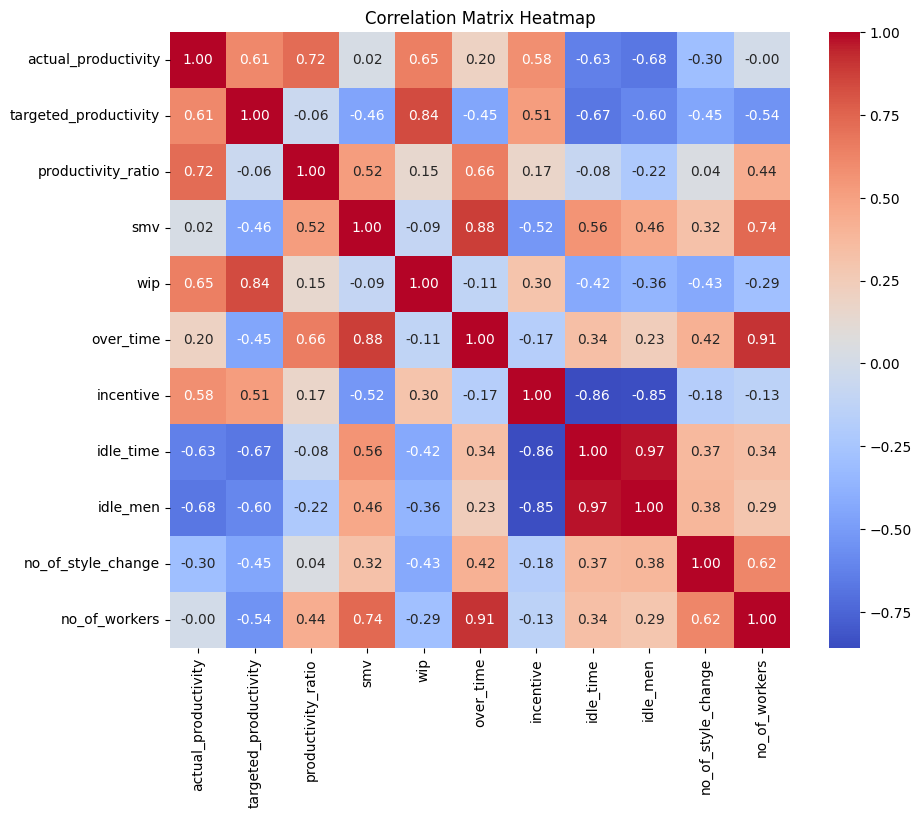

In [51]:
team_productivity = df.groupby('team').agg({
    'actual_productivity': 'mean',
    'targeted_productivity': 'mean',
    'productivity_ratio' : 'mean',
    'no_of_style_change' : 'mean',
    'idle_time' : 'mean',
    'smv' : 'mean',
    'wip' : 'mean',
    'over_time': 'mean',
    'incentive' : 'mean',
    'idle_men' : 'mean',
    'no_of_workers': 'mean'
}).reset_index()
correlation_matrix = team_productivity[['actual_productivity', 'targeted_productivity', 'productivity_ratio','smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers']].corr()
# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

By using the averages per team, the correlation values between the different features seem to have inflated. This is more useful for analyzing team-Level patterns, trends, and comparisons.

Here, the correlation values **WIP** and **actual_productivity** suggests a positive correlationship. A high WIP combined with a high productivity could indicate that the workflow is efficient. The manufacturing system may be fine-tuned to handle a large volume of work at the same time without bottlenecks, resulting in high productivity rates. This relationship may also indicate that the workload is distributed evenly across the various stages of production. A well-balanced workload can help to avoid delays and overburdening in any single stage, resulting in higher overall productivity.

A high **SMV** can be classified as an indicator of more **over_time** based on their high correlation value of 0.88. A high SMV typically indicates that the task will take longer to complete. If tasks with higher SMVs are more complex or difficult, it may result in more overtime because workers may be unable to complete these tasks within standard working hours.

The negative correlation of -0.63 between **idle_time** and **actual_productivity** indicates that as idle time decreases, the actual productivity increases. This relationship emphasizes the importance of reducing idle time in order to increase productivity. With that said, based on the feature map above, increasing incentives seems to reduce the amount of idle time spent within these teams as highlighted by the negative correlation of -0.62 between **idle_time** and **incentive**. Thus, managers may ought to look into increasing incentives distributed to their subordinates.

There is also a strong positive correlation between **no_of_workers** and **over_time** with a value of 0.91 implying that as the number of workers increases, so does the amount of overtime. This could be due to staffing issues or the nature of the workload necessitating more overtime from more workers as the workforce grows. However, these are just correlations, and not causations. Further analysis will be conducted to adress the implications of these features towards the actual productivity.

Another interesting takeaway is that a higher **no_of_style_changes** in a production cycle seems to entail a higher number of **idle_time**, **idle_men**, and **no_of_workers** used overall. Thus, these changes are usually something you may want to avoid as a manager as it takes up more resources such as time, energy, and manpower. A sudden change of style would need a refactoring of the processes, leading to a delay in production and a need for compensation in productivity.

To verify our findings, let us take a closer look at the factors that seem to directly affect the actual productivity by comparing their averages between teams.

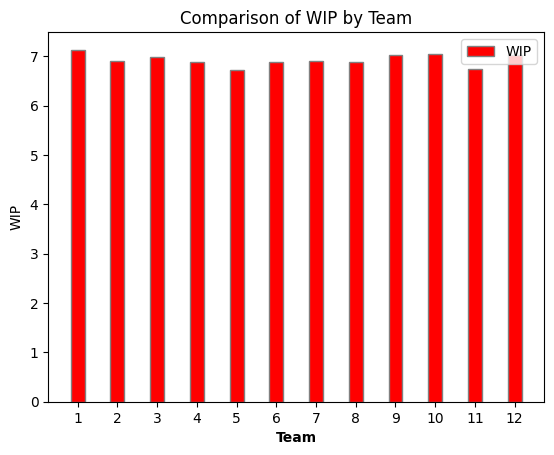

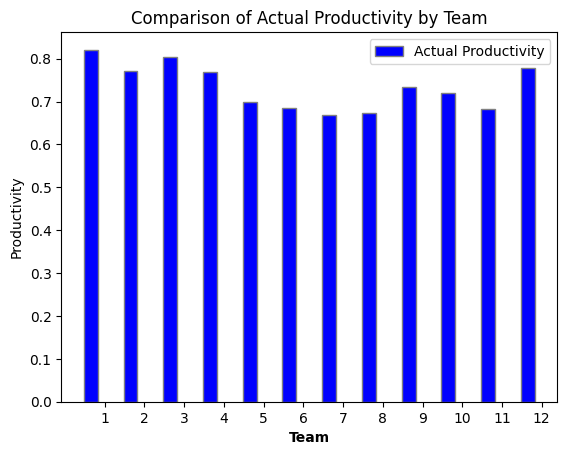

In [52]:

bar_width = 0.35
r1 = range(len(team_productivity))
r2 = [x + bar_width for x in r1]

plt.bar(r2, team_productivity['wip'], color='r', width=bar_width, edgecolor='grey', label='WIP')

# Adding labels and title
plt.xlabel('Team', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(team_productivity))], team_productivity['team'])
plt.ylabel('WIP')
plt.title('Comparison of WIP by Team')

# Creating legend & showing graphic
plt.legend()
plt.show()


r1 = range(len(team_productivity))

plt.bar(r1, team_productivity['actual_productivity'], color='b', width=bar_width, edgecolor='grey', label='Actual Productivity')


# Adding labels and title
plt.xlabel('Team', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(team_productivity))], team_productivity['team'])
plt.ylabel('Productivity')
plt.title('Comparison of Actual Productivity by Team')

# Creating legend & showing graphic
plt.legend()
plt.show()

The comparison of both bar graphs seems to verify our earlier conclusions as those with the highest productivities seem to have the highest WIPs as well. Team 1, which has the highest actual productivity, also has the highest WIP.

Interestingly, incentive doesn't seem to have that much of an impact on the actual_productivity at a day-to-day level of analysis.

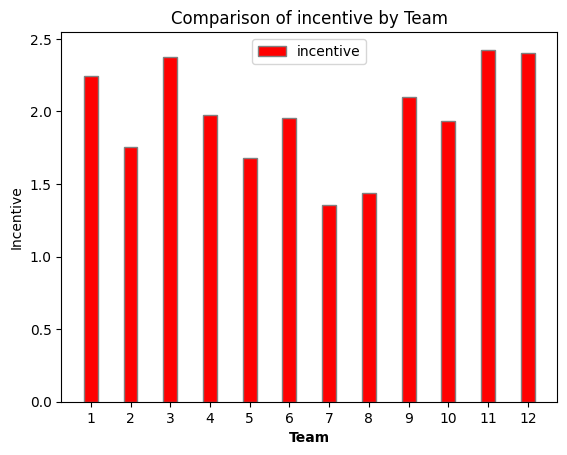

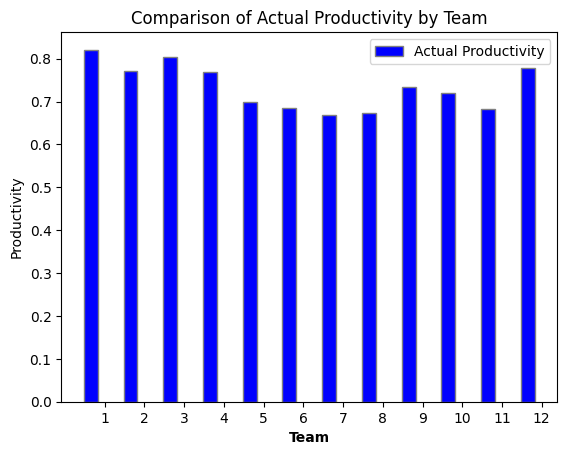

In [53]:

bar_width = 0.35
r1 = range(len(team_productivity))
r2 = [x + bar_width for x in r1]

plt.bar(r2, team_productivity['incentive'], color='r', width=bar_width, edgecolor='grey', label='incentive')

# Adding labels and title
plt.xlabel('Team', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(team_productivity))], team_productivity['team'])
plt.ylabel('Incentive')
plt.title('Comparison of incentive by Team')

# Creating legend & showing graphic
plt.legend()
plt.show()


r1 = range(len(team_productivity))

plt.bar(r1, team_productivity['actual_productivity'], color='b', width=bar_width, edgecolor='grey', label='Actual Productivity')


# Adding labels and title
plt.xlabel('Team', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(team_productivity))], team_productivity['team'])
plt.ylabel('Productivity')
plt.title('Comparison of Actual Productivity by Team')

# Creating legend & showing graphic
plt.legend()
plt.show()

The 2 bar graphs above also seem to be in line with our findings earlier as those teams with higher incentives seem to be performing better. On the other hand, the 3 teams with the lowest incentives also have one of the lowest productivity.

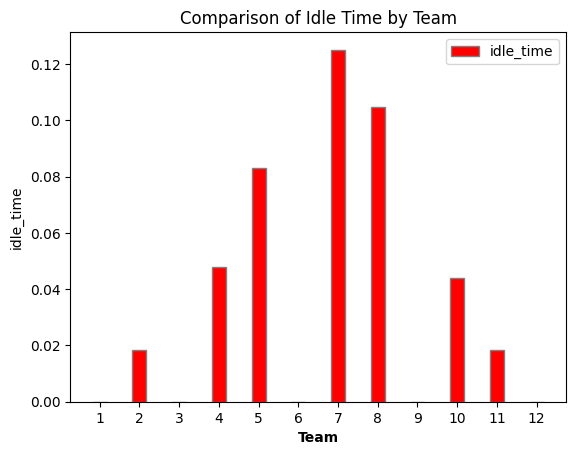

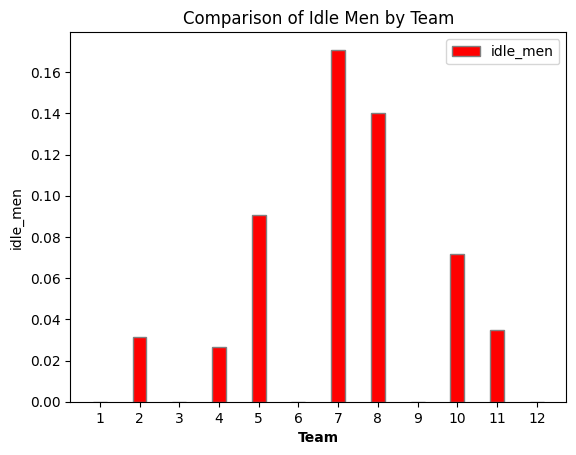

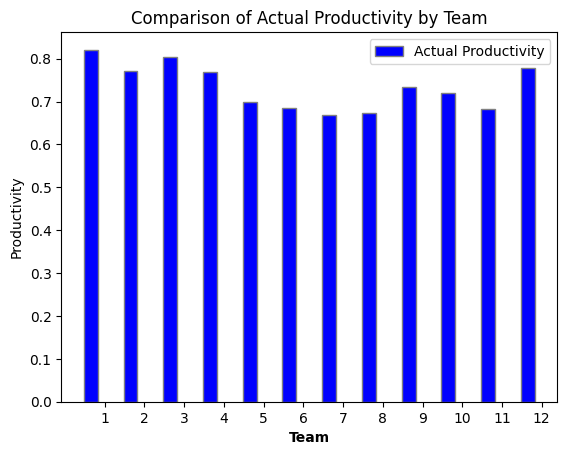

In [54]:
bar_width = 0.35

r1 = range(len(team_productivity))
r2 = [x + bar_width for x in r1]

plt.bar(r2, team_productivity['idle_time'], color='r', width=bar_width, edgecolor='grey', label='idle_time')

# Adding labels and title
plt.xlabel('Team', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(team_productivity))], team_productivity['team'])
plt.ylabel('idle_time')
plt.title('Comparison of Idle Time by Team')

# Creating legend & showing graphic
plt.legend()
plt.show()


r1 = range(len(team_productivity))
r2 = [x + bar_width for x in r1]

plt.bar(r2, team_productivity['idle_men'], color='r', width=bar_width, edgecolor='grey', label='idle_men')

# Adding labels and title
plt.xlabel('Team', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(team_productivity))], team_productivity['team'])
plt.ylabel('idle_men')
plt.title('Comparison of Idle Men by Team')

# Creating legend & showing graphic
plt.legend()
plt.show()


r1 = range(len(team_productivity))

plt.bar(r1, team_productivity['actual_productivity'], color='b', width=bar_width, edgecolor='grey', label='Actual Productivity')


# Adding labels and title
plt.xlabel('Team', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(team_productivity))], team_productivity['team'])
plt.ylabel('Productivity')
plt.title('Comparison of Actual Productivity by Team')

# Creating legend & showing graphic
plt.legend()
plt.show()

The graphs above strongly back our earlier findings as well. The 2 teams with the highest actual productivity have no idle_time and idle_men, while the 2 teams with the lowest actual productivity have the lowest idle_time and idle_men.

Next, let's look at the distribution of our data across different features.

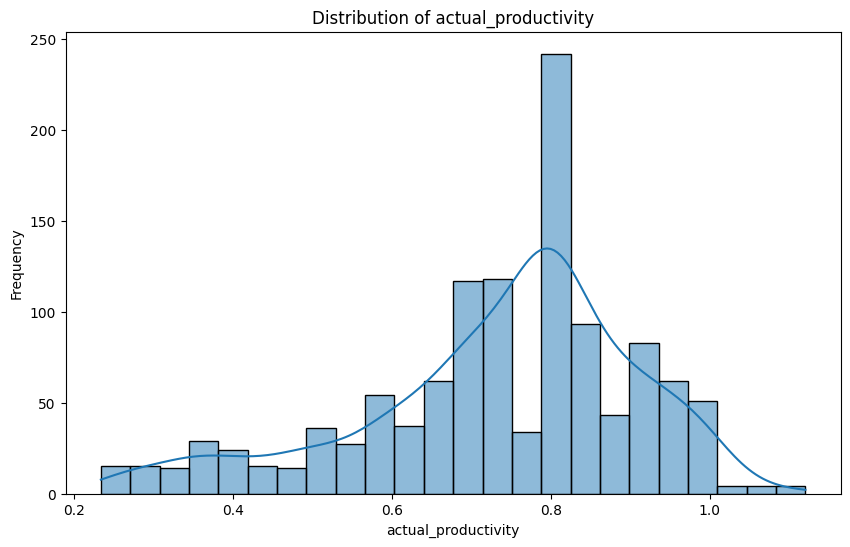

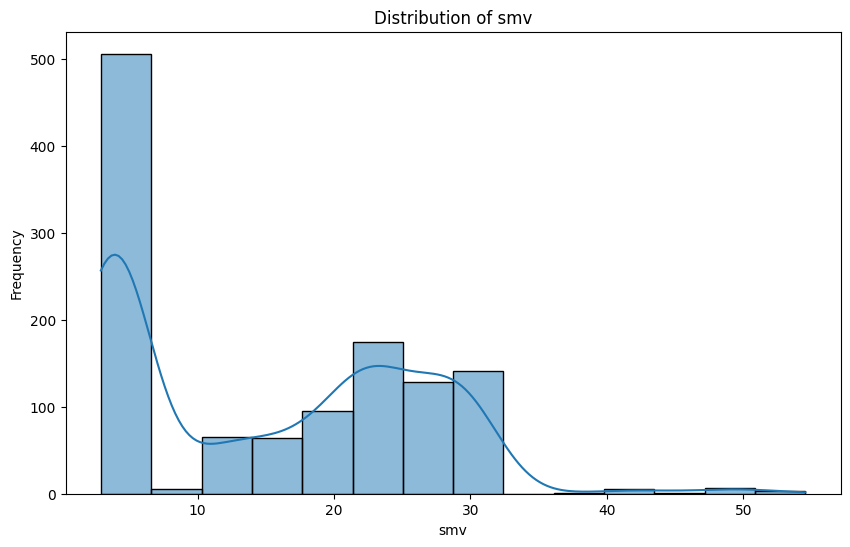

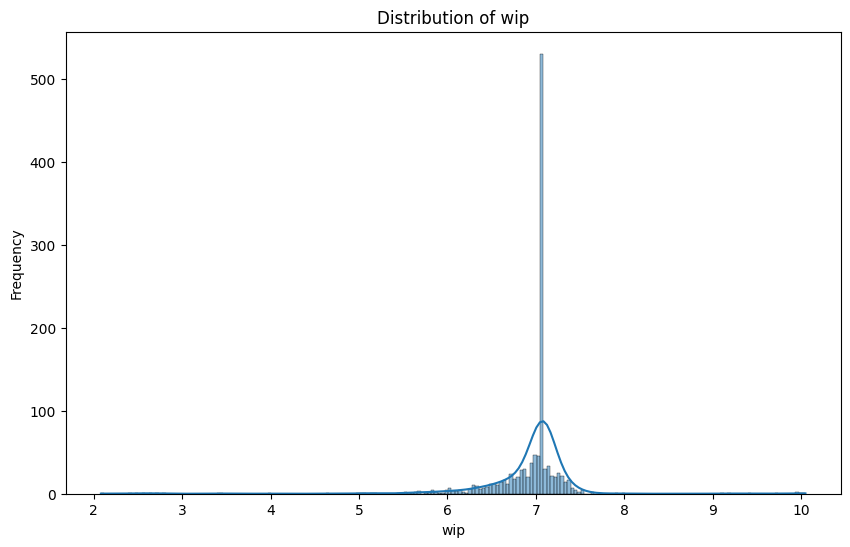

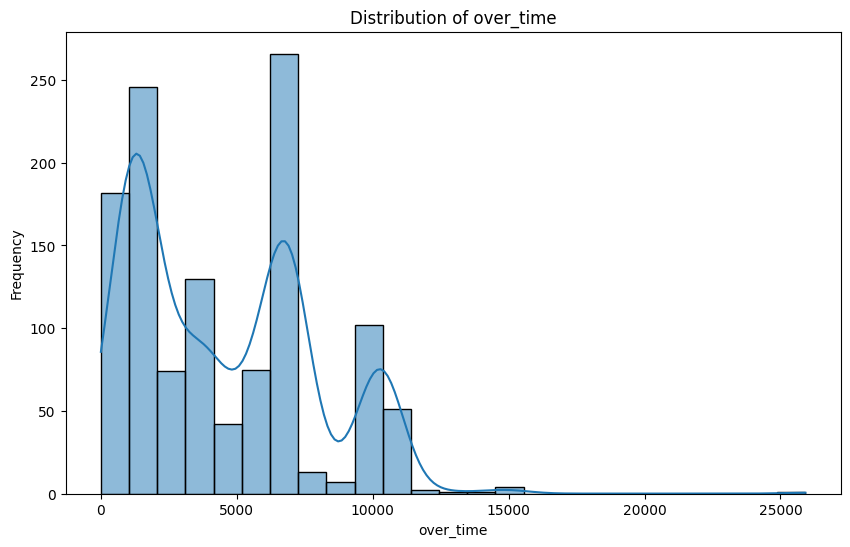

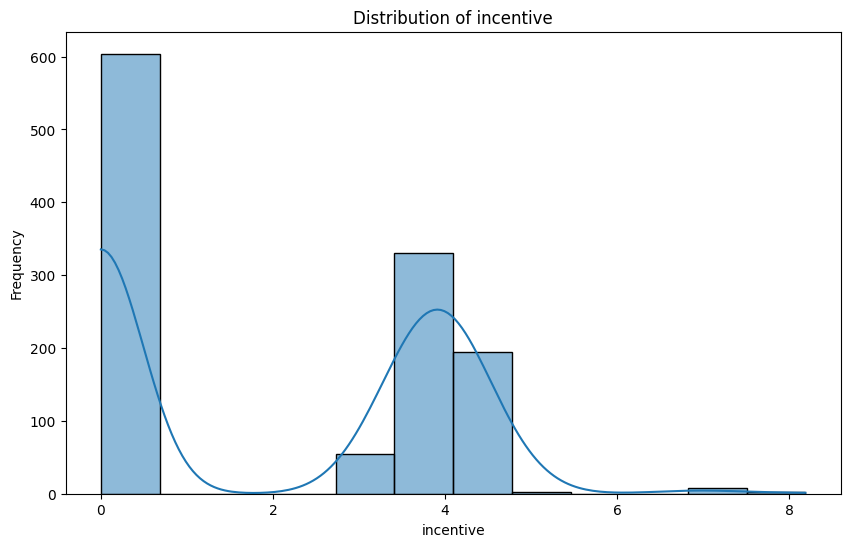

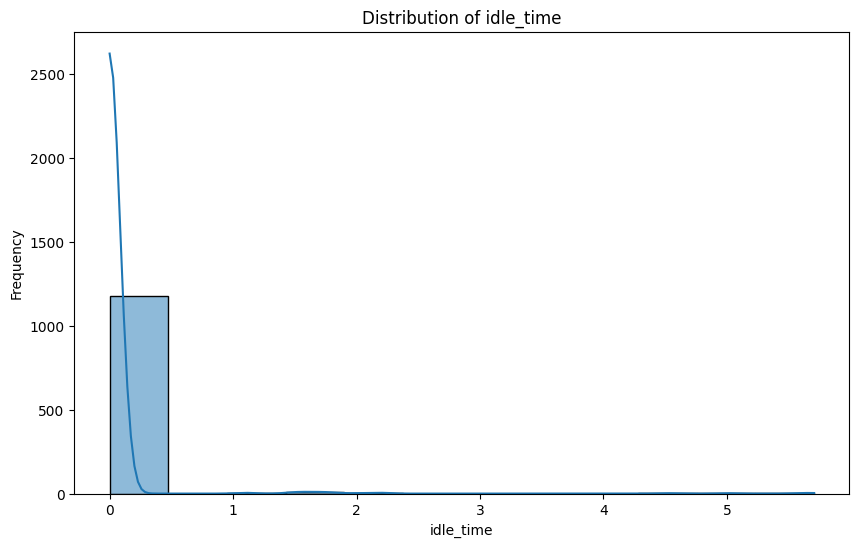

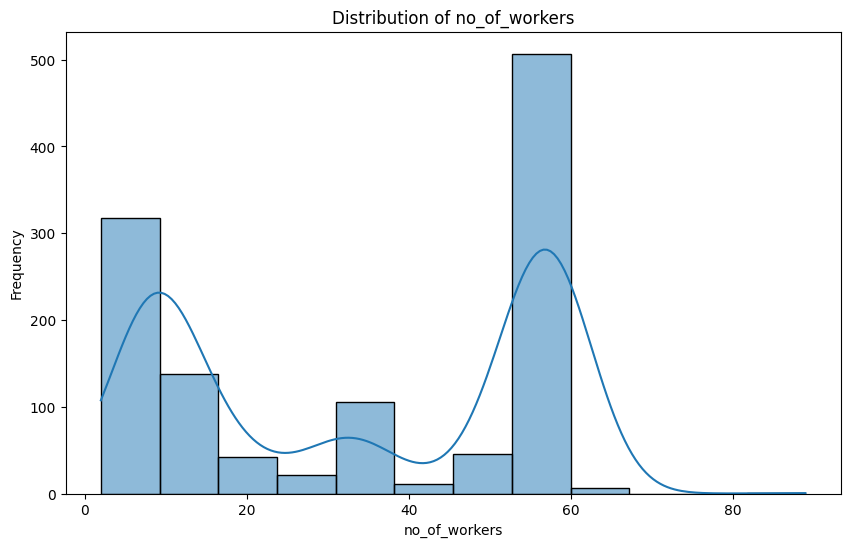

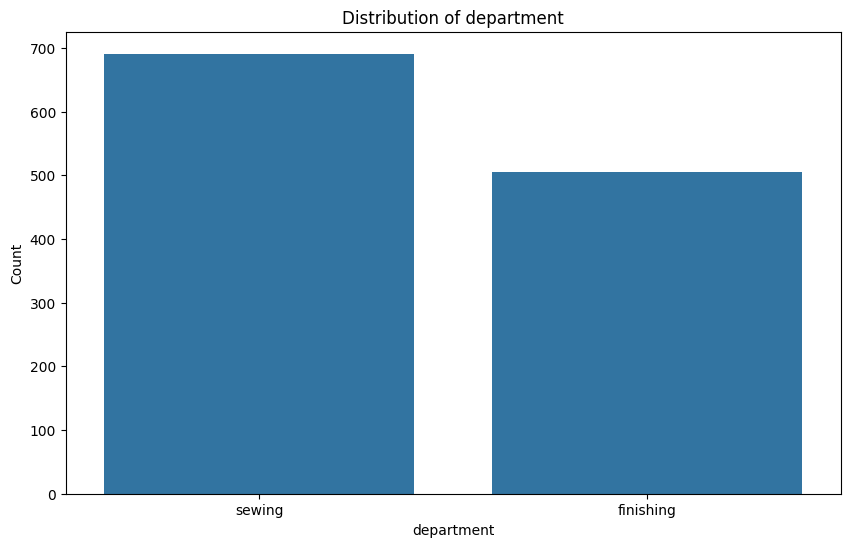

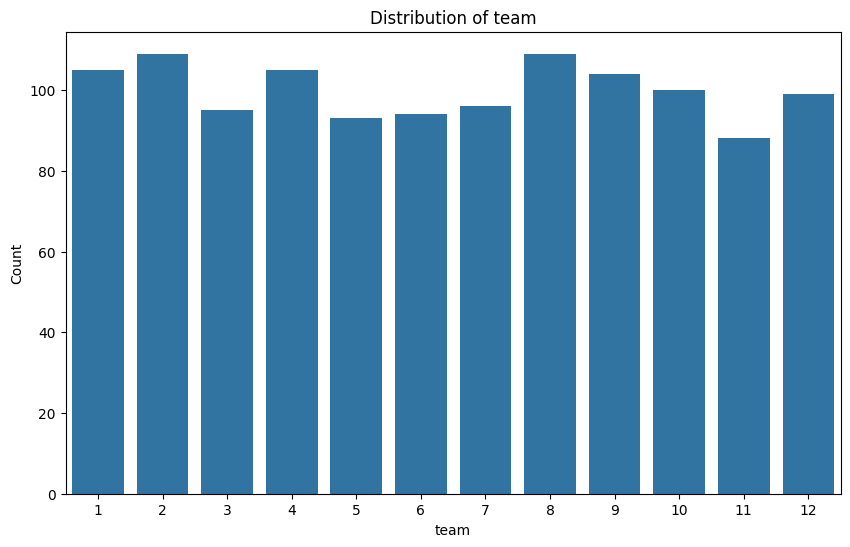

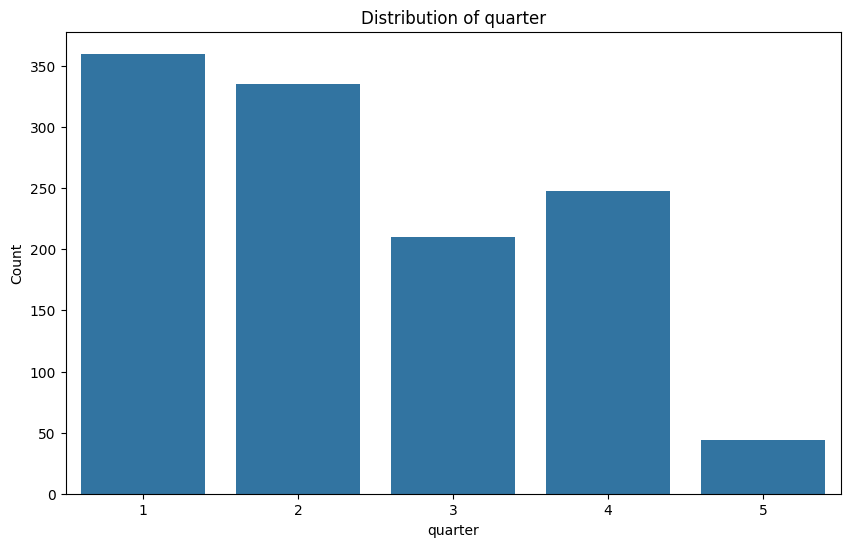

In [55]:
numerical_features = ['actual_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'no_of_workers']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Categorical distribution analysis with count plots
categorical_features = ['department', 'team', 'quarter']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of {feature}')
    plt.ylabel('Count')
    plt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, 'quarter'),
  Text(1, 0, 'day'),
  Text(2, 0, 'team'),
  Text(3, 0, 'targeted_productivity'),
  Text(4, 0, 'smv'),
  Text(5, 0, 'wip'),
  Text(6, 0, 'over_time'),
  Text(7, 0, 'incentive'),
  Text(8, 0, 'idle_time'),
  Text(9, 0, 'idle_men'),
  Text(10, 0, 'no_of_style_change'),
  Text(11, 0, 'no_of_workers'),
  Text(12, 0, 'actual_productivity'),
  Text(13, 0, 'productivity_ratio'),
  Text(14, 0, 'high_overtime'),
  Text(15, 0, 'low_overtime'),
  Text(16, 0, 'no_overtime'),
  Text(17, 0, 'department_finishing'),
  Text(18, 0, 'department_sewing'),
  Text(19, 0, 'month'),
  Text(20, 0, 'year'),
  Text(21, 0, 'wip_normalized'),
  Text(22, 0, 'incentive_normalized'),
  Text(23, 0, 'idle_time_normalized')])

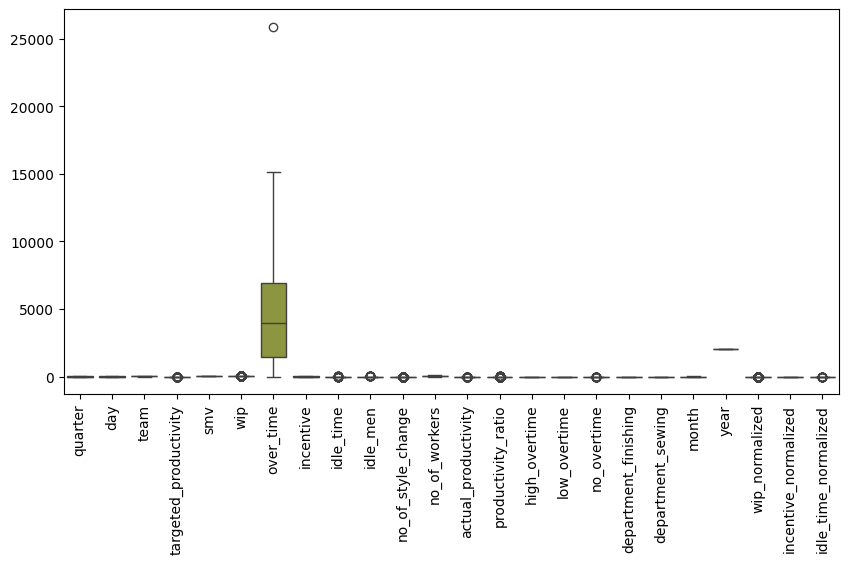

In [56]:
plt.figure(figsize=(10,5))
p = sns.boxplot(data = df, orient ='v',width=0.8)
plt.xticks(rotation=90)

Let us also use a scatterplot to better identify the relationship between the different features and the actual productivity. It will also help us identify if there are still any outliers, and better understand the patterns and spread in the data.

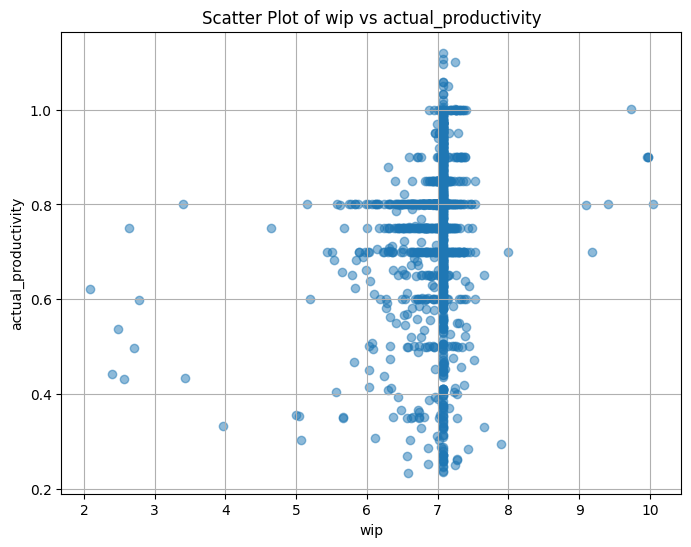

In [57]:
plt.figure(figsize=(8, 6))
plt.scatter(df['wip'], df['actual_productivity'], alpha=0.5)
plt.title('Scatter Plot of wip vs actual_productivity')
plt.xlabel('wip')
plt.ylabel('actual_productivity')
plt.grid(True)
plt.show()

## Section 6: Model training
Use machine learning models to accomplish your chosen task for the dataset. In this section of
the notebook, please take note of the following:
- The project should train and evaluate at least 3 different kinds of machine learning
models.
- Each model should be appropriate in accomplishing the chosen task for the dataset.
There should be a clear and correct justification on the use of each machine learning
model.
- Make sure that the values of the hyperparameters of each model are mentioned. At the
minimum, the optimizer, the learning rate, and the learning rate schedule should be
discussed per model.
- The report should show that the models are not overfitting nor underfitting.

### Feature Selection

Based on the EDA, let us select and filter the important features that may be useful for the accuracy development of our models

In [58]:
df.head()
df_new=df.drop(['date','department','team','wip','incentive','over_time','over_time_category','productivity_ratio'], axis=1)

We drop the fields such as `date`, `department`,`over_time_category`, and `team` since they contain non-numeric values which the model cannot understand. Instead they are represented as other features using different kinds of encoding. On the other hand, `wip`, `incentive`, and `over_time` are dropped since we already established normalized features that represent them. Lastly, `productivity_ratio` is dropped since we engineered that feature for our EDA.

### Splitting the Data for Training and Validation

We split our data into 80% for training and another 20% for testing

In [59]:

X = df_new.drop(['actual_productivity'], axis=1)
y = df_new.actual_productivity
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=13)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(957, 18)
(957,)
(240, 18)
(240,)


In [60]:
def compute_RMSE(actual, predictions):
    """
    Compute the Root Mean Square Error (RMSE) between actual and predicted values

    Parameters:
    actual (array-like): The actual values observed.
    predictions (array-like): The predicted values from the model.

    Returns:
    float: The RMSE value.
    """
    mse = mean_squared_error(actual, predictions)  # Mean Squared Error
    rmse = np.sqrt(mse)  # Root Mean Squared Error
    return rmse

### Model 1: Linear Regression

For our first model, we will be using Linear Regression to train with our dataset.

Linear Regression is a fundamental and versatile technique in both statistics and machine learning, well-suited for predicting a continuous outcome variable from one or more predictor variables. This model is particularly apt for the Garments Dataset for several reasons:

- **Interpretability**: Linear Regression provides clear insights into the contribution of each feature to the output, making it easier to interpret the results. This is crucial when dealing with a mix of continuous and categorical variables, as understanding the influence of each predictor on the target variable (like productivity) is essential.

- **Simplicity and Baseline Establishment**: As a relatively straightforward model, Linear Regression serves as an excellent starting point for regression tasks. It can act as a baseline against which more complex models can be compared. This is particularly relevant given the dataset's inclusion of numerical features such as 'smv', 'idle_time', 'idle_men', 'no_of_style_change', and 'no_of_workers'.

- **Handling Continuous Data and Transformations**: The dataset includes continuous variables that are well-suited for linear analysis. Additionally, after preprocessing steps like log1p transformations (to reduce skewness) and one-hot encoding (to handle categorical variables like 'over_time_category' and 'department'), the linear relationships in the data might become more pronounced. This makes Linear Regression a suitable model to capture these relationships effectively.

In summary, Linear Regression is chosen for its ability to provide a clear, interpretable model that can handle both the original and transformed features of the Garments Dataset effectively. Its simplicity and capability to establish a baseline make it an essential part of the modeling process.

In [61]:
lr = LinearRegression()

lr.fit(X_train, y_train)

lr_train_pred = lr.predict(X_train)
lr_train_mae = mean_absolute_error(y_train, lr_train_pred)
lr_train_mape = mean_absolute_percentage_error(y_train, lr_train_pred)
lr_train_mse = mean_squared_error(y_train, lr_train_pred)
lr_train_rmse = compute_RMSE(y_train, lr_train_pred)
lr_train_r2 = r2_score(y_train, lr_train_pred)

print("Training:")
print(f"Mean Absolute Error: {lr_train_mae}")
print(f"Mean Squared Error: {lr_train_mse}")
print(f"Root Mean Squared Error: {lr_train_rmse}")
print(f"R-squared: {lr_train_r2}")

lr_test_pred = lr.predict(X_test)
lr_test_mae = mean_absolute_error(y_test, lr_test_pred)
lr_test_mape = mean_absolute_percentage_error(y_test, lr_test_pred)
lr_test_mse = mean_squared_error(y_test, lr_test_pred)
lr_test_rmse = compute_RMSE(y_test, lr_test_pred)
lr_test_r2 = r2_score(y_test, lr_test_pred)

print("Test:")
print(f"Mean Absolute Error: {lr_test_mae}")
print(f"Mean Squared Error: {lr_test_mse}")
print(f"Root Mean Squared Error: {lr_test_rmse}")
print(f"R-squared: {lr_test_r2}")

Training:
Mean Absolute Error: 0.10328827204224923
Mean Squared Error: 0.020696785128665796
Root Mean Squared Error: 0.14386377281534707
R-squared: 0.3304874277661698
Test:
Mean Absolute Error: 0.1029865387758791
Mean Squared Error: 0.020300412038942284
Root Mean Squared Error: 0.14247951445363044
R-squared: 0.286400547390507


An `MAE` of `0.10299` means that, on average, the predicted values are approximately 0.10299 units away from the actual values. The smaller the MAE, the closer the predictions are to the actual outcomes. The reported `MSE` of `0.02030` is the average squared difference between the estimated values and the actual value. MSE is more sensitive to outliers than MAE because it squares the errors. The square root of the `MSE`, which is approximately `0.14247`, is the RMSE. It represents the residuals' standard deviation (prediction errors). Residuals are a measure of how far away data points are from the regression line, and `RMSE` is a measure of how spread out these residuals are. The coefficient of determination is a statistical measure of how well the regression predictions match the actual data points. An `R-squared` of `0.28640` indicates that the variation in the independent variables used in the regression explains approximately 28.64% of the variation in the dependent variable (the thing you're trying to predict). It is a measure of how well the model replicates observed outcomes, based on the proportion of total variation explained by the model.

In [62]:

coefficients = lr.coef_

feature_importances = zip(X_train.columns, coefficients)

sorted_feature_importances = sorted(list(feature_importances), key=lambda x: abs(x[1]), reverse=True)
for feature, importance in sorted_feature_importances:
    print(f"{feature}: {importance}")


targeted_productivity: 0.5914642533445875
incentive_normalized: 0.30431857755617264
wip_normalized: 0.23958612961222214
department_finishing: 0.11203659072529128
department_sewing: -0.1120365907252912
idle_men: -0.06746548908251773
idle_time: 0.03178481482686408
low_overtime: 0.029293940597046944
no_of_style_change: -0.02626445012257596
no_overtime: -0.02268450157463462
month: -0.007960675119771176
high_overtime: -0.006609439022413473
idle_time_normalized: 0.005569336030388223
no_of_workers: 0.005236833104768623
smv: -0.004924473570439147
quarter: -0.0034713188272843974
day: 0.003307245274639676
year: 0.0


Based on the coefficients, we can see that there are certain features or attributes that are more "significant" than others. Let us evaluate the effect of removing some of the features.

In [63]:
X_train = X_train.drop(['year'], axis=1)
X_test = X_test.drop(['year'], axis=1)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
og_lr_mae = mean_absolute_error(y_test, lr_pred)
og_lr_mape = mean_absolute_percentage_error(y_test, lr_pred)
og_lr_mse = mean_squared_error(y_test, lr_pred)
og_rmse_lr = compute_RMSE(y_test, lr_pred)
og_r2_lr = r2_score(y_test, lr_pred)

print(f"Mean Absolute Error: {og_lr_mae}")
print(f"Mean Absolute Percentage Error: {og_lr_mape}")
print(f"Mean Squared Error: {og_lr_mse}")
print(f"Root Mean Squared Error: {og_rmse_lr}")
print(f"R-squared: {og_r2_lr}")

Mean Absolute Error: 0.10298653877587892
Mean Absolute Percentage Error: 0.175790777604364
Mean Squared Error: 0.02030041203894229
Root Mean Squared Error: 0.14247951445363047
R-squared: 0.2864005473905067


As you can see, the removal of day and year fields seems to have even reduced our RMSE.

#### Lasso Variation

We will also be experimenting with Lasso which uses L1

In [64]:
lasso = Lasso()
lasso.fit(X_train, y_train)

lasso_train_pred = lasso.predict(X_train)
lasso_train_mae = mean_absolute_error(y_train, lasso_train_pred)
lasso_train_mape = mean_absolute_percentage_error(y_train, lasso_train_pred)
lasso_train_mse = mean_squared_error(y_train, lasso_train_pred)
lasso_train_rmse = compute_RMSE(y_train, lasso_train_pred)
lasso_train_r2 = r2_score(y_train, lasso_train_pred)

print("Train:")
print(f"Mean Absolute Error: {lasso_train_mae}")
print(f"Mean Absolute Percentage Error: {lasso_train_mape}")
print(f"Mean Squared Error: {lasso_train_mse}")
print(f"Root Mean Squared Error: {lasso_train_rmse}")
print(f"R-squared: {lasso_train_r2}\n")

lasso_test_pred = lasso.predict(X_test)
lasso_test_mae = mean_absolute_error(y_test, lasso_test_pred)
lasso_test_mape = mean_absolute_percentage_error(y_test, lasso_test_pred)
lasso_test_mse = mean_squared_error(y_test, lasso_test_pred)
lasso_test_rmse = compute_RMSE(y_test, lasso_test_pred)
lasso_test_r2 = r2_score(y_test, lasso_test_pred)

print("Test:")
print(f"Mean Absolute Error: {lasso_test_mae}")
print(f"Mean Absolute Percentage Error: {lasso_test_mape}")
print(f"Mean Squared Error: {lasso_test_mse}")
print(f"Root Mean Squared Error: {lasso_test_rmse}")
print(f"R-squared: {lasso_test_r2}")

Train:
Mean Absolute Error: 0.13623666372006957
Mean Absolute Percentage Error: 0.2428528275181388
Mean Squared Error: 0.030913213563131346
Root Mean Squared Error: 0.17582153896246996
R-squared: 0.0

Test:
Mean Absolute Error: 0.1325929595803335
Mean Absolute Percentage Error: 0.22780032305922315
Mean Squared Error: 0.028458366221271566
Root Mean Squared Error: 0.16869607648452162
R-squared: -0.00036760429804449934


Here, there is a clear dropoff in performance and accuracy with regards to the Lasso variation. The `MAE` is around 0.03 higher than the prior linear regression model at `0.13259`. Its `MSE` is higher as well at `0.02846`. Its biggest difference lies in its `R-squared`, where it clocked in a negative value of `-0.00037` which is not a good indicator.

#### Ridge Variation

Lastly, to round up our experiments with Linear Regression models, we will be using Ridge as well.

In [65]:
ridge = Ridge()
ridge.fit(X_train, y_train)

ridge_train_pred = ridge.predict(X_train)
ridge_train_mae = mean_absolute_error(y_train, ridge_train_pred)
ridge_train_mape = mean_absolute_percentage_error(y_train, ridge_train_pred)
ridge_train_mse = mean_squared_error(y_train, ridge_train_pred)
ridge_train_rmse = compute_RMSE(y_train, ridge_train_pred)
ridge_train_r2 = r2_score(y_train, ridge_train_pred)

print("Train:")
print(f"Mean Absolute Error: {ridge_train_mae}")
print(f"Mean Absolute Percentage Error: {ridge_train_mape}")
print(f"Mean Squared Error: {ridge_train_mse}")
print(f"Root Mean Squared Error: {ridge_train_rmse}")
print(f"R-squared: {ridge_train_r2}\n")

ridge_test_pred = ridge.predict(X_test)
ridge_test_mae = mean_absolute_error(y_test, ridge_test_pred)
ridge_test_mape = mean_absolute_percentage_error(y_test, ridge_test_pred)
ridge_test_mse = mean_squared_error(y_test, ridge_test_pred)
ridge_test_rmse = compute_RMSE(y_test, ridge_test_pred)
ridge_test_r2 = r2_score(y_test, ridge_test_pred)

print("Test:")
print(f"Mean Absolute Error: {ridge_test_mae}")
print(f"Mean Absolute Percentage Error: {ridge_test_mape}")
print(f"Mean Squared Error: {ridge_test_mse}")
print(f"Root Mean Squared Error: {ridge_test_rmse}")
print(f"R-squared: {ridge_test_r2}")

Train:
Mean Absolute Error: 0.10434895310425593
Mean Absolute Percentage Error: 0.18280741480625584
Mean Squared Error: 0.020741860690688802
Root Mean Squared Error: 0.14402034818277867
R-squared: 0.32902929524523494

Test:
Mean Absolute Error: 0.10349910107750455
Mean Absolute Percentage Error: 0.17706559610562572
Mean Squared Error: 0.020297195937005363
Root Mean Squared Error: 0.14246822781590765
R-squared: 0.2865135997057664


Lastly, the Ridge variation seems to perform very similarly to the original Linear Regression model with very negligible differences across measured factors.

### Model 2: Decision Trees Regressor

For the second model, we'll be using Decision Trees Regressor.

Decision Trees are versatile models that find application in both classification and regression tasks. Their distinctive characteristic lies in the creation of a tree structure through dataset splits based on decision rules. In the context of the Garments Dataset, Decision Trees offer several advantages.

Firstly, they excel in capturing non-linear relationships within the data. This is particularly beneficial for our dataset, where complex and non-linear associations between features and the target variable, such as 'no_of_style_change', 'no_of_workers', and 'idle_men', may significantly impact productivity.

Moreover, Decision Trees handle categorical data, such as 'department' and 'day of the week', seamlessly without requiring extensive preprocessing. This capability is crucial for datasets like ours, which include categorical features that play a pivotal role in predicting outcomes.

Additionally, Decision Trees exhibit robustness to outliers, making them less sensitive to extreme values compared to many other regression methods. Given the presence of outliers in our dataset, this characteristic contributes to the model's stability and reliability.

In summary, the use of Decision Trees in regression tasks proves advantageous due to their adeptness in handling non-linear relationships, accommodating categorical features, and demonstrating resilience to outliers—qualities that align well with the characteristics of the Garments Dataset.

Let's begin by initializing the Decision Tree Regressor with a random state of 42 as the seed and training the model on the dataset. Subsequently, we will utilize the test set for making predictions.

In [66]:
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [67]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

dtr_train_pred = dtr.predict(X_train)
dtr_train_mae = mean_absolute_error(y_train, dtr_train_pred)
dtr_train_mape = mean_absolute_percentage_error(y_train, dtr_train_pred)
dtr_train_mse = mean_squared_error(y_train, dtr_train_pred)
dtr_train_rmse = compute_RMSE(y_train, dtr_train_pred)
dtr_train_r2 = r2_score(y_train, dtr_train_pred)

print("Train:")
print(f"Mean Absolute Error: {dtr_train_mae}")
print(f"Mean Absolute Percentage Error: {dtr_train_mape}")
print(f"Mean Squared Error: {dtr_train_mse}")
print(f"Root Mean Squared Error: {dtr_train_rmse}")
print(f"R-squared: {dtr_train_r2}\n")

dtr_test_pred = dtr.predict(X_test)
dtr_test_mae = mean_absolute_error(y_test, dtr_test_pred)
dtr_test_mape = mean_absolute_percentage_error(y_test, dtr_test_pred)
dtr_test_mse = mean_squared_error(y_test, dtr_test_pred)
dtr_test_rmse = compute_RMSE(y_test, dtr_test_pred)
dtr_test_r2 = r2_score(y_test, dtr_test_pred)

print("Test:")
print(f"Mean Absolute Error: {dtr_test_mae}")
print(f"Mean Absolute Percentage Error: {dtr_test_mae}")
print(f"Mean Squared Error: {dtr_test_mse}")
print(f"Root Mean Squared Error: {dtr_test_rmse}")
print(f"R-squared: {dtr_test_r2}")

Train:
Mean Absolute Error: 0.007327888716126789
Mean Absolute Percentage Error: 0.013302836375402763
Mean Squared Error: 0.0014124628332940665
Root Mean Squared Error: 0.03758274648417897
R-squared: 0.9543087673363522

Test:
Mean Absolute Error: 0.08226493430833333
Mean Absolute Percentage Error: 0.08226493430833333
Mean Squared Error: 0.02238891082630399
Root Mean Squared Error: 0.14962924455568166
R-squared: 0.2129857029736567


The Mean Squared Error (MSE) is a measure of the average squared difference between the predicted values and the actual values. In this context, a `MSE` of `0.02160` indicates that, on average, the squared difference between the predicted and actual values for our target variable is relatively low. The strikingly low training error values, in comparison to those of the test set, may indicate high variance and overfitting

### Model 3: Support Vector Regressor

For the third model, we'll be using the Support Vector Regressor (SVR), a variant of the Support Vector Machine (SVM) tailored for regression tasks.

SVR inherits the robustness and versatility of SVM, making it an ideal choice for handling complex datasets like the Garments Dataset. Its key strengths include:

- **Versatility in Handling Data**: SVR is capable of effectively managing both linear and non-linear data. This is particularly important for datasets with a diverse mix of features, where the relationships between variables might not be linear or straightforward.

- **Effectiveness in High-Dimensional Spaces**: With multiple features, the Garments Dataset represents a high-dimensional space where SVR excels. Even after reducing the feature set, the remaining variables such as 'smv', 'idle_time', and 'no_of_workers' can exhibit complex and subtle relationships. SVR is adept at capturing these nuances.

- **Kernel Function Flexibility**: A significant advantage of SVR is its ability to use various kernel functions, including linear, polynomial, or radial basis function (RBF). This flexibility allows SVR to adapt to different data distributions, enhancing its capability to model the specific characteristics of the dataset accurately.

- **Margin Maximization for Generalization**: SVR focuses on maximizing the margin, which in the context of regression, translates to finding the best decision boundary. This approach can lead to better generalization on unseen data, a critical aspect of predictive modeling.

- **Handling Encoded Categorical Variables**: After encoding categorical variables, the dataset might have more dimensions than samples. SVR is particularly effective in such scenarios, leveraging kernel tricks to capture non-linear relationships in a high-dimensional space.

In summary, the choice of SVR for the Garments Dataset is driven by its ability to handle the complexity and high dimensionality of the data, its kernel function flexibility, and its effectiveness in modeling both linear and non-linear relationships. These attributes make SVR a powerful and sophisticated tool for regression tasks in datasets with diverse and intricate feature sets.

Let's initialize a Support Vector Regressor (SVR) with a linear kernel, which assumes a linear relationship between the input features and the target variable.

In [68]:
svr = SVR(kernel = 'linear')

In [69]:
SVR_X_train = X_train
SVR_X_test = X_test

Next, let's fit the train data and predict the test data.

In [70]:
scaler = StandardScaler()
SVR_X_train_scaled = scaler.fit_transform(SVR_X_train)
SVR_X_test_scaled = scaler.fit_transform(SVR_X_test)

In [71]:
svr.fit(SVR_X_train_scaled, y_train)

SVR(kernel='linear')

In [72]:
svr_train_pred = svr.predict(SVR_X_train_scaled)
svr_train_mae = mean_absolute_error(y_train, svr_train_pred)
svr_train_mape = mean_absolute_percentage_error(y_train, svr_train_pred)
svr_train_mse = mean_squared_error(y_train, svr_train_pred)
svr_train_rmse = compute_RMSE(y_train, svr_train_pred)
svr_train_r2 = r2_score(y_train, svr_train_pred)

print("Train:")
print(f"Mean Absolute Error: {svr_train_mae}")
print(f"Mean Absolute Percentage Error: {svr_train_mape}")
print(f"Mean Squared Error: {svr_train_mse}")
print(f"Root Mean Squared Error: {svr_train_rmse}")
print(f"R-squared: {svr_train_r2}\n")

svr_test_pred = svr.predict(SVR_X_test_scaled)
svr_test_mae = mean_absolute_error(y_test, svr_test_pred)
svr_test_mape = mean_absolute_percentage_error(y_test, svr_test_pred)
svr_test_mse = mean_squared_error(y_test, svr_test_pred)
svr_test_rmse = compute_RMSE(y_test, svr_test_pred)
svr_test_r2 = r2_score(y_test, svr_test_pred)

print("Test:")
print(f"Mean Absolute Error: {svr_test_mae}")
print(f"Mean Absolute Percentage Error: {svr_test_mape}")
print(f"Mean Squared Error: {svr_test_mse}")
print(f"Root Mean Squared Error: {svr_test_rmse}")
print(f"R-squared: {svr_test_r2}")


Train:
Mean Absolute Error: 0.10432810465722345
Mean Absolute Percentage Error: 0.18439796872261122
Mean Squared Error: 0.021040759490586793
Root Mean Squared Error: 0.14505433289146102
R-squared: 0.3193603296008972

Test:
Mean Absolute Error: 0.10588273808190003
Mean Absolute Percentage Error: 0.1795155515442089
Mean Squared Error: 0.020465182126916576
Root Mean Squared Error: 0.14305656967408584
R-squared: 0.2806085543827138


The Mean Squared Error (MSE) before tuning is 0.02047, indicating that, on average, the model's predictions closely match the actual values. This value serves as a baseline measure of the model's accuracy, providing a solid starting point for further refinement and enhancement through the next step, hyperparameter tuning.

To reiterate, here is the MSE of all the model used before tuning:

In [73]:
before_data = {
    'Linear': [
        lr_train_mae, lr_train_mape, lr_train_mse, lr_train_rmse, lr_train_r2,
        lr_test_mae,lr_test_mape, lr_test_mse, lr_test_rmse, lr_test_r2
    ],
    'Lasso': [
        lasso_train_mae, lasso_train_mape, lasso_train_mse, lasso_train_rmse, lasso_train_r2,
        lasso_test_mae,lasso_test_mape, lasso_test_mse, lasso_test_rmse, lasso_test_r2
    ],
    'Ridge': [
        ridge_train_mae, ridge_train_mape, ridge_train_mse, ridge_train_rmse, ridge_train_r2,
        ridge_test_mae,ridge_test_mape, ridge_test_mse, ridge_test_rmse, ridge_test_r2
    ],
    'Decision Tree': [
        dtr_train_mae, dtr_train_mape, dtr_train_mse, dtr_train_rmse, dtr_train_r2,
        dtr_test_mae, dtr_test_mape, dtr_test_mse, dtr_test_rmse, dtr_test_r2
    ],
    'Support Vector': [
        svr_train_mae, svr_train_mape, svr_train_mse, svr_train_rmse, svr_train_r2,
        svr_test_mae, svr_test_mape, svr_test_mse, svr_test_rmse, svr_test_r2
    ]
}

before_tuning = pd.DataFrame(before_data, index=['Train MAE', 'Train MAPE', 'Train MSE', 'Train RMSE', 'Train R2',
                                                                          'Test MAE', 'Test MAPE', 'Test MSE', 'Test RMSE', 'Test R2'])

before_tuning

,Linear,Lasso,Ridge,Decision Tree,Support Vector
Train MAE,0.103288,0.136237,0.104349,0.007328,0.104328
Train MAPE,0.180638,0.242853,0.182807,0.013303,0.184398
Train MSE,0.020697,0.030913,0.020742,0.001412,0.021041
Train RMSE,0.143864,0.175822,0.144020,0.037583,0.145054
Train R2,0.330487,0.000000,0.329029,0.954309,0.319360
Test MAE,0.102987,0.132593,0.103499,0.082265,0.105883
Test MAPE,0.175791,0.227800,0.177066,0.127864,0.179516
Test MSE,0.020300,0.028458,0.020297,0.022389,0.020465
Test RMSE,0.142480,0.168696,0.142468,0.149629,0.143057
Test R2,0.286401,-0.000368,0.286514,0.212986,0.280609


## Section 7: Hyperparameter tuning

Perform grid search or random search to tune the hyperparameters of each model. In this section
of the notebook, please take note of the following:
- Make sure to elaborately explain the method of hyperparameter tuning.
- Explicitly mention the different hyperparameters and their range of values. Show the
corresponding performance of each configuration.
- Report the performance of all models using appropriate evaluation metrics and
visualizations.
- Properly interpret the result based on relevant evaluation metrics

In this section, we further train and refine our initial models to improve accuracy.

### Model 1: Linear Regression

In [74]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [75]:
lasso.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [76]:
ridge.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

Unfortunately, only the lasso and ridge variations contain hyperparameters that can be configured. Most cases focus on the fine tuning of the `alpha` values. To do this, we populate a list with different possible values and use a `GridSearchCV` to make the process of finding the best parameter a lot easier.

#### Lasso

In this implementation, the Lasso regression model will undergo a meticulous tuning process to enhance its performance on the given dataset. A predefined set of alpha values, specifically [0.001, 0.01, 0.1, 1, 10, 100], will be systematically tested during hyperparameter tuning, representing various degrees of regularization strength. Employing a grid search methodology alongside cross-validation, the model will rigorously explore different alpha values to pinpoint the one that minimizes the negative mean squared error. This iterative approach will ensure that the Lasso model achieves an optimal balance between fitting the training data and preventing overfitting.

Following hyperparameter tuning, a new Lasso model will be instantiated with the best-performing alpha. Its efficacy will then be evaluated on both the training and test sets, leveraging key regression metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared. This systematic and data-driven approach will not only refine the Lasso regression model but also provide valuable insights into its predictive accuracy on previously unseen data.

In [77]:
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]

lasso = Lasso()

lasso_cv = GridSearchCV(estimator=lasso, param_grid={'alpha': alpha_values}, scoring='neg_mean_squared_error', cv=5)

lasso_cv.fit(X_train, y_train)

best_alpha = lasso_cv.best_params_['alpha']

best_lasso_model = Lasso(alpha=best_alpha)
best_lasso_model.fit(X_train, y_train)

Lasso(alpha=0.001)

In [78]:
best_lasso_train_pred = best_lasso_model.predict(X_train)
best_lasso_train_mae = mean_absolute_error(y_train, best_lasso_train_pred)
best_lasso_train_mape = mean_absolute_percentage_error(y_train, best_lasso_train_pred)
best_lasso_train_mse = mean_squared_error(y_train, best_lasso_train_pred)
best_lasso_train_rmse = np.sqrt(best_lasso_train_mse)  # Compute RMSE
best_lasso_train_r2 = r2_score(y_train, best_lasso_train_pred)

print("Train:")
print(f"Mean Absolute Error (after tuning): {best_lasso_train_mae}")
print(f"Mean Absolute Percentage Error (after tuning): {best_lasso_train_mape}")
print(f"Mean Squared Error (after tuning): {best_lasso_train_mse}")
print(f"Root Mean Squared Error (after tuning): {best_lasso_train_rmse}")
print(f"R-squared (after tuning): {best_lasso_train_r2}\n")

best_lasso_test_pred = best_lasso_model.predict(X_test)
best_lasso_test_mae = mean_absolute_error(y_test, best_lasso_test_pred)
best_lasso_test_mape = mean_absolute_percentage_error(y_test, best_lasso_test_pred)
best_lasso_test_mse = mean_squared_error(y_test, best_lasso_test_pred)
best_lasso_test_rmse = np.sqrt(best_lasso_test_mse)  # Compute RMSE
best_lasso_test_r2 = r2_score(y_test, best_lasso_test_pred)

print("Test:")
print(f"Best Alpha (after tuning): {best_alpha}")
print(f"Mean Absolute Error (after tuning): {best_lasso_test_mae}")
print(f"Mean Absolute Percentage Error (after tuning): {best_lasso_test_mape}")
print(f"Mean Squared Error (after tuning): {best_lasso_test_mse}")
print(f"Root Mean Squared Error (after tuning): {best_lasso_test_rmse}")
print(f"R-squared (after tuning): {best_lasso_test_r2}")

Train:
Mean Absolute Error (after tuning): 0.10601105956053482
Mean Absolute Percentage Error (after tuning): 0.1862394900306213
Mean Squared Error (after tuning): 0.021167853313414836
Root Mean Squared Error (after tuning): 0.145491763730511
R-squared (after tuning): 0.3152490189935905

Test:
Best Alpha (after tuning): 0.001
Mean Absolute Error (after tuning): 0.1043142505216919
Mean Absolute Percentage Error (after tuning): 0.1788683778895351
Mean Squared Error (after tuning): 0.02038401785200363
Root Mean Squared Error (after tuning): 0.14277260889961924
R-squared (after tuning): 0.28346163845008243


In [79]:
import pandas as pd

multi_columns = pd.MultiIndex.from_product([['Before Tuning', 'After Tuning'], ['Train', 'Test']])

lasso_final_df = pd.DataFrame([
    [lasso_train_mae, lasso_test_mae, best_lasso_train_mae, best_lasso_test_mae],
    [lasso_train_mse, lasso_test_mse, best_lasso_train_mse, best_lasso_test_mse],
    [lasso_train_rmse, lasso_test_rmse, best_lasso_train_rmse, best_lasso_test_rmse],
    [lasso_train_r2, lasso_test_r2, best_lasso_train_r2, best_lasso_test_r2],
    [lasso_train_mape, lasso_test_mape, best_lasso_train_mape, best_lasso_test_mape]
], index=['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'R^2 score', 'Mean Absolute Percentage Error'], columns=multi_columns)

print("Lasso Regression")
lasso_final_df

Lasso Regression


Before Tuning           After Tuning          
                                       Train      Test        Train      Test
Mean Absolute Error                 0.136237  0.132593     0.106011  0.104314
Mean Squared Error                  0.030913  0.028458     0.021168  0.020384
Root Mean Squared Error             0.175822  0.168696     0.145492  0.142773
R^2 score                           0.000000 -0.000368     0.315249  0.283462
Mean Absolute Percentage Error      0.242853  0.227800     0.186239  0.178868

After fine tuning, we can see a clear improvement across all factors from the previous results we saw earlier. The `R-squared` value jumped from a `-0.00037` to a `0.28346`. The other measures of error have also largely improved and have started to resemble the results of the other 2 variations of Linear Regression.

#### Ridge

In a similar vein to the Lasso regression implementation, the Ridge regression model is poised for refinement on the provided dataset. Utilizing a predetermined set of alpha values—specifically [0.001, 0.01, 0.1, 1, 10, 100]—the hyperparameter tuning process will systematically evaluate the impact of different regularization strengths. Employing the grid search methodology with a 5-fold cross-validation strategy, the model will select the optimal alpha that minimizes the negative mean squared error. Subsequent steps involve instantiating a new Ridge model with the best alpha, followed by an evaluation of its performance on both the training and test sets using essential regression metrics. This parallel approach ensures a meticulous fine-tuning of the Ridge regression model, akin to the steps taken for Lasso regression.

In [80]:
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]

ridge = Ridge()

ridge_cv = GridSearchCV(estimator=ridge, param_grid={'alpha': alpha_values}, scoring='neg_mean_squared_error', cv=5)

ridge_cv.fit(X_train, y_train)

best_alpha = ridge_cv.best_params_['alpha']

best_ridge_model = Ridge(alpha=best_alpha).fit(X_train, y_train)

In [81]:
best_ridge_train_pred = best_ridge_model.predict(X_train)
best_ridge_train_mae = mean_absolute_error(y_train, best_ridge_train_pred)
best_ridge_train_mape = mean_absolute_percentage_error(y_train, best_ridge_train_pred)
best_ridge_train_mse = mean_squared_error(y_train, best_ridge_train_pred)
best_ridge_train_rmse = np.sqrt(best_ridge_train_mse)  # Compute RMSE
best_ridge_train_r2 = r2_score(y_train, best_ridge_train_pred)

print("Train:")
print(f"Mean Absolute Error (after tuning): {best_ridge_train_mae}")
print(f"Mean Absolute Percentage Error (after tuning): {best_ridge_train_mape}")
print(f"Mean Squared Error (after tuning): {best_ridge_train_mse}")
print(f"Root Mean Squared Error (after tuning): {best_ridge_train_rmse}")
print(f"R-squared (after tuning): {best_ridge_train_r2}\n")

best_ridge_test_pred = best_ridge_model.predict(X_test)
best_ridge_test_mae = mean_absolute_error(y_test, best_ridge_test_pred)
best_ridge_test_mape = mean_absolute_percentage_error(y_test, best_ridge_test_pred)
best_ridge_test_mse = mean_squared_error(y_test, best_ridge_test_pred)
best_ridge_test_rmse = np.sqrt(best_ridge_test_mse)  # Compute RMSE
best_ridge_test_r2 = r2_score(y_test, best_ridge_test_pred)

print("Test:")
print(f"Best Alpha (after tuning): {best_alpha}")
print(f"Mean Absolute Error (after tuning): {best_ridge_test_mae}")
print(f"Mean Absolute Percentage Error (after tuning): {best_ridge_test_mape}")
print(f"Mean Squared Error (after tuning): {best_ridge_test_mse}")
print(f"Root Mean Squared Error (after tuning): {best_ridge_test_rmse}")
print(f"R-squared (after tuning): {best_ridge_test_r2}")

Train:
Mean Absolute Error (after tuning): 0.10434895310425593
Mean Absolute Percentage Error (after tuning): 0.18280741480625584
Mean Squared Error (after tuning): 0.020741860690688802
Root Mean Squared Error (after tuning): 0.14402034818277867
R-squared (after tuning): 0.32902929524523494

Test:
Best Alpha (after tuning): 1
Mean Absolute Error (after tuning): 0.10349910107750455
Mean Absolute Percentage Error (after tuning): 0.17706559610562572
Mean Squared Error (after tuning): 0.020297195937005363
Root Mean Squared Error (after tuning): 0.14246822781590765
R-squared (after tuning): 0.2865135997057664


In [82]:
multi_columns = pd.MultiIndex.from_product([['Before Tuning', 'After Tuning'], ['Train', 'Test']])

ridge_final_df = pd.DataFrame([
    [ridge_train_mae, ridge_test_mae, best_ridge_train_mae, best_ridge_test_mae],
    [ridge_train_mse, ridge_test_mse, best_ridge_train_mse, best_ridge_test_mse],
    [ridge_train_rmse, ridge_test_rmse, best_ridge_train_rmse, best_ridge_test_rmse],
    [ridge_train_r2, ridge_test_r2, best_ridge_train_r2, best_ridge_test_r2],
    [ridge_train_mape, ridge_test_mape, best_ridge_train_mape, best_ridge_test_mape]
], index=['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'R^2 score', 'Mean Absolute Percentage Error'], columns=multi_columns)

print("Ridge Regression")
ridge_final_df

Ridge Regression


Before Tuning           After Tuning          
                                       Train      Test        Train      Test
Mean Absolute Error                 0.104349  0.103499     0.104349  0.103499
Mean Squared Error                  0.020742  0.020297     0.020742  0.020297
Root Mean Squared Error             0.144020  0.142468     0.144020  0.142468
R^2 score                           0.329029  0.286514     0.329029  0.286514
Mean Absolute Percentage Error      0.182807  0.177066     0.182807  0.177066

On the other hand, there are almost no differences or improvements for the Ridge variation.

### Model 2: Decision Trees Regressor

Next, the Decision Tree Regressor will undergo refinement through Randomized Search Cross-Validation on the dataset. A predefined parameter grid, including 'min_impurity_decrease', 'max_depth', 'min_samples_split', and 'max_leaf_nodes', will be explored for optimal hyperparameter values. The search, planned with 10 iterations, will efficiently sample combinations within specified ranges to maximize the model's performance. This process, facilitated by a random state of 42 for reproducibility and a 5-fold cross-validation, will streamline the exploration of hyperparameter space.

Following the Randomized Search, the model will be fine-tuned based on the best hyperparameter configuration, optimizing its predictive accuracy. This systematic approach aims to enhance the Decision Tree Regressor's effectiveness and improve its generalizability to new data in future predictions.

First, get the available `hyperparameters` for the `DecisionTreeRegressor`

In [83]:
DecisionTreeRegressor().get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

Next, create and train a `RandomizedSearch` object so that the best parameters for the `SVR` model could be obtained

In [84]:
param_grid = {
    'min_impurity_decrease': [0.001, 0.01, 0.05, 0.1, 0.3, 0.5],
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [2, 4, 6, 10, 15, 20],
    'max_leaf_nodes': [3, 5, 10, 20, 50, 100]
}
randomized_search = RandomizedSearchCV(estimator = DecisionTreeRegressor(), param_distributions=param_grid, n_iter=10, random_state=42, cv=5)
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'max_depth': [5, 10, 20, 30],
                                        'max_leaf_nodes': [3, 5, 10, 20, 50,
                                                           100],
                                        'min_impurity_decrease': [0.001, 0.01,
                                                                  0.05, 0.1,
                                                                  0.3, 0.5],
                                        'min_samples_split': [2, 4, 6, 10, 15,
                                                              20]},
                   random_state=42)

In the upcoming analysis, the Decision Tree Regressor will be fine-tuned using the best hyperparameters obtained from the earlier Randomized Search Cross-Validation. The best hyperparameters, identified as best_params, will be utilized to instantiate and train a refined Decision Tree Regressor (best_dtr). Subsequently, predictions will be made on both the training and test sets using the tuned model.

In [85]:
best_params = randomized_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'min_samples_split': 2, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 10, 'max_depth': 30}


In [86]:
best_dtr = DecisionTreeRegressor(**best_params)
best_dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=30, max_leaf_nodes=10,
                      min_impurity_decrease=0.001)

On the training set, metrics such as Mean Absolute Error (MAE), Mean Absolute Percentage Error (MAPE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2) will be computed to assess the model's performance after tuning. Similarly, on the test set, these evaluation metrics will be calculated to gauge the predictive accuracy of the fine-tuned Decision Tree Regressor. This comprehensive analysis aims to showcase the improved performance of the model with the optimized hyperparameter configuration, providing valuable insights into its future predictive capabilities.

In [87]:
best_dtr_train_pred = best_dtr.predict(X_train)
best_dtr_train_mae = mean_absolute_error(y_train, best_dtr_train_pred)
best_dtr_train_mape = mean_absolute_percentage_error(y_train, best_dtr_train_pred)
best_dtr_train_mse = mean_squared_error(y_train, best_dtr_train_pred)
best_dtr_train_rmse = mean_squared_error(y_train, best_dtr_train_pred, squared=False)
best_dtr_train_r2 = r2_score(y_train, best_dtr_train_pred)

print("Train:")
print(f"Mean Absolute Error (after tuning): {best_dtr_train_mae}")
print(f"Mean Absolute Percentage Error (after tuning): {best_dtr_train_mape}")
print(f"Mean Squared Error (after tuning): {best_dtr_train_mse}")
print(f"Root Mean Squared Error (after tuning): {best_dtr_train_rmse}")
print(f"R2 (after tuning): {best_dtr_train_r2}")

best_dtr_test_pred = best_dtr.predict(X_test)
best_dtr_test_mae = mean_absolute_error(y_test, best_dtr_test_pred)
best_dtr_test_mape = mean_absolute_percentage_error(y_test, best_dtr_test_pred)
best_dtr_test_mse = mean_squared_error(y_test, best_dtr_test_pred)
best_dtr_test_rmse = mean_squared_error(y_test, best_dtr_test_pred, squared=False)
best_dtr_test_r2 = r2_score(y_test, best_dtr_test_pred)

print("\nTest:")
print(f"Mean Absolute Error (after tuning): {best_dtr_test_mae}")
print(f"Mean Absolute Percentage Error (after tuning): {best_dtr_test_mape}")
print(f"Mean Squared Error (after tuning): {best_dtr_test_mse}")
print(f"Root Mean Squared Error (after tuning): {best_dtr_test_rmse}")
print(f"R2 (after tuning): {best_dtr_test_r2}")

Train:
Mean Absolute Error (after tuning): 0.10856907303499803
Mean Absolute Percentage Error (after tuning): 0.1946271373765377
Mean Squared Error (after tuning): 0.023166326295980613
Root Mean Squared Error (after tuning): 0.15220488262858262
R2 (after tuning): 0.25060116287586676

Test:
Mean Absolute Error (after tuning): 0.10778447472659526
Mean Absolute Percentage Error (after tuning): 0.18420068230575282
Mean Squared Error (after tuning): 0.022041735901005433
Root Mean Squared Error (after tuning): 0.14846459477264415
R2 (after tuning): 0.22518958514991716


In [88]:
multi_columns_dtr = pd.MultiIndex.from_product([['Before Tuning', 'After Tuning'], ['Train', 'Test']])

dtr_final_df = pd.DataFrame([
    [dtr_train_mae, dtr_test_mae, best_dtr_train_mae, best_dtr_test_mae],
    [dtr_train_mse, dtr_test_mse, best_dtr_train_mse, best_dtr_test_mse],
    [dtr_train_rmse, dtr_test_rmse, best_dtr_train_rmse, best_dtr_test_rmse],
    [dtr_train_r2, dtr_test_r2, best_dtr_train_r2, best_dtr_test_r2],
    [dtr_train_mape, dtr_test_mape, best_dtr_train_mape, best_dtr_test_mape]
], index=['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'R^2 score', 'Mean Absolute Percentage Error'], columns=multi_columns_dtr)

print("Decision Tree Regression")
dtr_final_df

Decision Tree Regression


Before Tuning           After Tuning          
                                       Train      Test        Train      Test
Mean Absolute Error                 0.007328  0.082265     0.108569  0.107784
Mean Squared Error                  0.001412  0.022389     0.023166  0.022042
Root Mean Squared Error             0.037583  0.149629     0.152205  0.148465
R^2 score                           0.954309  0.212986     0.250601  0.225190
Mean Absolute Percentage Error      0.013303  0.127864     0.194627  0.184201

After the hyperparameter tuning, while the goal of decreasing the variance has been observed, there seems the model's train and test errors have slightly increased. This tradeoff could have been the result of the bias-variance tradeoff

### Model 3: Support Vector Regressor

The Support Vector Regressor (SVR) will undergo optimization through Randomized Search Cross-Validation. The hyperparameter search space, defined by `param_dist`, includes parameters such as 'kernel', 'C', 'gamma', and 'degree'. The 'kernel' parameter explores options like 'linear', 'rbf', and 'poly'. 'C' is randomly sampled from a uniform distribution between 0.1 and 10. 'gamma' considers both 'scale' and 'auto' options, along with random values between 0.1 and 1.0. 'degree' is selected from a predefined set of values [2, 3, 4, 5].

During the Randomized Search, 20 iterations will be conducted, considering various combinations within the specified parameter distributions. The analysis, facilitated by a random state of 42 and a 3-fold cross-validation strategy, aims to identify the optimal hyperparameters that minimize the negative mean squared error.

The best hyperparameters obtained from this search will be utilized for fine-tuning the SVR model, enhancing its predictive accuracy. This systematic approach ensures that the SVR model is tailored to the dataset, paving the way for improved performance in future predictions.

First, get the available `hyperparameters` for the `SVR`

In [89]:
SVR().get_params().keys()

dict_keys(['C', 'cache_size', 'coef0', 'degree', 'epsilon', 'gamma', 'kernel', 'max_iter', 'shrinking', 'tol', 'verbose'])

In the upcoming analysis, the Support Vector Regressor will be fine-tuned using the best hyperparameters obtained from the earlier Randomized Search Cross-Validation. The best hyperparameters, identified as `best_random_params`, will be utilized to instantiate and train a refined Support Vestor Regressor (`best_svr`). Subsequently, predictions will be made on both the training and test sets using the tuned model.

In [90]:
param_dist = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': np.random.uniform(0.1, 10, 20),
    'gamma': ['scale', 'auto'] + list(np.random.uniform(0.1, 1.0, 10)),
    'degree': [2, 3, 4, 5]
}
C = np.random.uniform(0.1, 10, 20)
param_grid_linear = {'C': C}
grid_linear = GridSearchCV(SVR(kernel='linear'), param_grid_linear, scoring='accuracy', cv=5, n_jobs=-1)
grid_linear.fit(SVR_X_train_scaled, y_train)
best_params_linear = grid_linear.best_params_
best_score_linear = grid_linear.best_score_

param_grid_poly = {'C': C, 'degree': [1, 3, 5, 10, 20],}
grid_poly = GridSearchCV(SVR(kernel='poly'), param_grid_poly, scoring='accuracy', cv=5, n_jobs=-1)
grid_poly.fit(SVR_X_train_scaled, y_train)
best_params_poly = grid_poly.best_params_
best_score_poly = grid_poly.best_score_

param_grid_rbf = {'C': C, 'gamma': ['scale', 'auto'] + list(np.random.uniform(0.1, 1.0, 10))}
grid_rbf = GridSearchCV(SVR(kernel='rbf'), param_grid_rbf, scoring='accuracy', cv=5, n_jobs=-1)
grid_rbf.fit(SVR_X_train_scaled, y_train)
best_params_rbf = grid_rbf.best_params_
best_score_rbf = grid_rbf.best_score_

best_kernel = max([(best_score_linear, 'linear'), (best_score_poly, 'poly'), (best_score_rbf, 'rbf')])
best_params = {
    'linear': best_params_linear,
    'poly': best_params_poly,
    'rbf': best_params_rbf
}

gscv_best_params = best_params[best_kernel[1]]

# Perform the random search
# randomized_search = RandomizedSearchCV(estimator=SVR(), param_distributions=param_dist, n_iter=20, cv=3, scoring='neg_mean_squared_error', random_state=42)
# randomized_search.fit(SVR_X_train_scaled, y_train)
# best_random_params = randomized_search.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan

Then, check the values for the best combination of `hyperparameters`, create a new `SVR()` model, now with the best parameters obtained from `RandomizedSearch` and train it

In [91]:
best_svr = SVR(**gscv_best_params)
best_svr.fit(SVR_X_train_scaled, y_train)
print(gscv_best_params)

{'C': 3.1593030290201765}


On the training set, metrics such as Mean Absolute Error (MAE), Mean Absolute Percentage Error (MAPE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2) will be computed to assess the model's performance after tuning. Similarly, on the test set, these evaluation metrics will be calculated to gauge the predictive accuracy of the fine-tuned Decision Tree Regressor. This comprehensive analysis aims to showcase the improved performance of the model with the optimized hyperparameter configuration, providing valuable insights into its future predictive capabilities.

In [92]:
best_svr_train_pred = best_svr.predict(SVR_X_train_scaled)
best_svr_train_mae = mean_absolute_error(y_train, best_svr_train_pred)
best_svr_train_mape = mean_absolute_percentage_error(y_train, best_svr_train_pred)
best_svr_train_mse = mean_squared_error(y_train, best_svr_train_pred)
best_svr_train_rmse = mean_squared_error(y_train, best_svr_train_pred, squared=False)
best_svr_train_r2 = r2_score(y_train, best_svr_train_pred)

print("Train:")
print(f"Mean Absolute Error (after tuning): {best_svr_train_mae}")
print(f"Mean Absolute Percentage Error (after tuning): {best_svr_train_mape}")
print(f"Mean Squared Error (after tuning): {best_svr_train_mse}")
print(f"Root Mean Squared Error (after tuning): {best_svr_train_rmse}")
print(f"R2 (after tuning): {best_svr_train_r2}")

best_svr_test_pred = best_svr.predict(SVR_X_test_scaled)
best_svr_test_mae = mean_absolute_error(y_test, best_svr_test_pred)
best_svr_test_mape = mean_absolute_percentage_error(y_test, best_svr_test_pred)
best_svr_test_mse = mean_squared_error(y_test, best_svr_test_pred)
best_svr_test_rmse = mean_squared_error(y_test, best_svr_test_pred, squared=False)
best_svr_test_r2 = r2_score(y_test, best_svr_test_pred)

print("\nTest:")
print(f"Mean Absolute Error (after tuning): {best_svr_test_mae}")
print(f"Mean Absolute Percentage Error (after tuning): {best_svr_test_mape}")
print(f"Mean Squared Error (after tuning): {best_svr_test_mse}")
print(f"Root Mean Squared Error (after tuning): {best_svr_test_rmse}")
print(f"R2 (after tuning): {best_svr_test_r2}")

Train:
Mean Absolute Error (after tuning): 0.08406580856970512
Mean Absolute Percentage Error (after tuning): 0.1482269351030803
Mean Squared Error (after tuning): 0.014354825669386439
Root Mean Squared Error (after tuning): 0.1198116257688979
R2 (after tuning): 0.535641105701585

Test:
Mean Absolute Error (after tuning): 0.08691397935388645
Mean Absolute Percentage Error (after tuning): 0.14543351240277366
Mean Squared Error (after tuning): 0.016348306621355894
Root Mean Squared Error (after tuning): 0.12786049671949462
R2 (after tuning): 0.4253248341111229


In [93]:
multi_columns_svr = pd.MultiIndex.from_product([['Before Tuning', 'After Tuning'], ['Train', 'Test']])

svr_final_df = pd.DataFrame([
    [svr_train_mae, svr_test_mae, best_svr_train_mae, best_svr_test_mae],
    [svr_train_mse, svr_test_mse, best_svr_train_mse, best_svr_test_mse],
    [svr_train_rmse, svr_test_rmse, best_svr_train_rmse, best_svr_test_rmse],
    [svr_train_r2, svr_test_r2, best_svr_train_r2, best_svr_test_r2],
    [svr_train_mape, svr_test_mape, best_svr_train_mape, best_svr_test_mape]
], index=['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'R^2 score', 'Mean Absolute Percentage Error'], columns=multi_columns_svr)

print("Support Vector Regressor")
svr_final_df

Support Vector Regressor


Before Tuning           After Tuning          
                                       Train      Test        Train      Test
Mean Absolute Error                 0.104328  0.105883     0.084066  0.086914
Mean Squared Error                  0.021041  0.020465     0.014355  0.016348
Root Mean Squared Error             0.145054  0.143057     0.119812  0.127860
R^2 score                           0.319360  0.280609     0.535641  0.425325
Mean Absolute Percentage Error      0.184398  0.179516     0.148227  0.145434

After hyperparameter tuning, given the metrics measured on the model, the errors for the SVR model seems to have only increased slightly, or even only insignificantly.

In [94]:
results = randomized_search.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(f"Mean Squared Error: {mean_score} - Params: {params}")

Mean Squared Error: -0.006955690885031185 - Params: {'min_samples_split': 2, 'min_impurity_decrease': 0.1, 'max_leaf_nodes': 100, 'max_depth': 5}
Mean Squared Error: 0.22441525304670043 - Params: {'min_samples_split': 2, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 10, 'max_depth': 30}
Mean Squared Error: -0.006955690885031185 - Params: {'min_samples_split': 20, 'min_impurity_decrease': 0.1, 'max_leaf_nodes': 100, 'max_depth': 20}
Mean Squared Error: -0.006955690885031185 - Params: {'min_samples_split': 10, 'min_impurity_decrease': 0.1, 'max_leaf_nodes': 10, 'max_depth': 10}
Mean Squared Error: -0.006955690885031185 - Params: {'min_samples_split': 20, 'min_impurity_decrease': 0.1, 'max_leaf_nodes': 3, 'max_depth': 5}
Mean Squared Error: -0.006955690885031185 - Params: {'min_samples_split': 20, 'min_impurity_decrease': 0.01, 'max_leaf_nodes': 10, 'max_depth': 10}
Mean Squared Error: -0.006955690885031185 - Params: {'min_samples_split': 20, 'min_impurity_decrease': 0.05, 'max_leaf_n

To reiterate, here is the MSE of all the model used after tuning:

In [95]:
after_data = {
    'Lasso': [
        best_lasso_train_mae, best_lasso_train_mape, best_lasso_train_mse, best_lasso_train_rmse, best_lasso_train_r2,
        best_lasso_test_mae,best_lasso_test_mape, best_lasso_test_mse, best_lasso_test_rmse, best_lasso_test_r2
    ],
    'Ridge': [
        best_ridge_train_mae,best_ridge_train_mape, best_ridge_train_mse, best_ridge_train_rmse, best_ridge_train_r2,
        best_ridge_test_mae,best_ridge_test_mape, best_ridge_test_mse, best_ridge_test_rmse, best_ridge_test_r2
    ],
    'Decision Tree': [
        best_dtr_train_mae, best_dtr_train_mape,best_dtr_train_mse, best_dtr_train_rmse, best_dtr_train_r2,
        best_dtr_test_mae, best_dtr_test_mape,best_dtr_test_mse, best_dtr_test_rmse, best_dtr_test_r2
    ],
    'Support Vector': [
        best_svr_train_mae,best_svr_train_mape, best_svr_train_mse, best_svr_train_rmse, best_svr_train_r2,
        best_svr_test_mae,best_svr_test_mape, best_svr_test_mse, best_svr_test_rmse, best_svr_test_r2
    ]
}

after_tuning = pd.DataFrame(after_data, index=['Train MAE', 'Train MAPE', 'Train MSE', 'Train RMSE', 'Train R2',
                                                      'Test MAE', 'Test MAPE', 'Test MSE', 'Test RMSE', 'Test R2'])

after_tuning

,Lasso,Ridge,Decision Tree,Support Vector
Train MAE,0.106011,0.104349,0.108569,0.084066
Train MAPE,0.186239,0.182807,0.194627,0.148227
Train MSE,0.021168,0.020742,0.023166,0.014355
Train RMSE,0.145492,0.144020,0.152205,0.119812
Train R2,0.315249,0.329029,0.250601,0.535641
Test MAE,0.104314,0.103499,0.107784,0.086914
Test MAPE,0.178868,0.177066,0.184201,0.145434
Test MSE,0.020384,0.020297,0.022042,0.016348
Test RMSE,0.142773,0.142468,0.148465,0.127860
Test R2,0.283462,0.286514,0.225190,0.425325


## Section 8: Model Selection


For us to be able to logically select a model, we need to first compare their different results and configurations.

Let us also take a look again at our before and after tuning results:

In [96]:
print("Before Tuning: ")
before_tuning

Before Tuning: 


,Linear,Lasso,Ridge,Decision Tree,Support Vector
Train MAE,0.103288,0.136237,0.104349,0.007328,0.104328
Train MAPE,0.180638,0.242853,0.182807,0.013303,0.184398
Train MSE,0.020697,0.030913,0.020742,0.001412,0.021041
Train RMSE,0.143864,0.175822,0.144020,0.037583,0.145054
Train R2,0.330487,0.000000,0.329029,0.954309,0.319360
Test MAE,0.102987,0.132593,0.103499,0.082265,0.105883
Test MAPE,0.175791,0.227800,0.177066,0.127864,0.179516
Test MSE,0.020300,0.028458,0.020297,0.022389,0.020465
Test RMSE,0.142480,0.168696,0.142468,0.149629,0.143057
Test R2,0.286401,-0.000368,0.286514,0.212986,0.280609


In [97]:
print("\nAfter Tuning:")
after_tuning


After Tuning:


,Lasso,Ridge,Decision Tree,Support Vector
Train MAE,0.106011,0.104349,0.108569,0.084066
Train MAPE,0.186239,0.182807,0.194627,0.148227
Train MSE,0.021168,0.020742,0.023166,0.014355
Train RMSE,0.145492,0.144020,0.152205,0.119812
Train R2,0.315249,0.329029,0.250601,0.535641
Test MAE,0.104314,0.103499,0.107784,0.086914
Test MAPE,0.178868,0.177066,0.184201,0.145434
Test MSE,0.020384,0.020297,0.022042,0.016348
Test RMSE,0.142773,0.142468,0.148465,0.127860
Test R2,0.283462,0.286514,0.225190,0.425325


Upon reviewing the performance metrics from five different regression models—Linear, Lasso, Ridge, Decision Tree Regressor (DTR), and Support Vector Regressor (SVR)—applied to our dataset for predicting actual productivity, the SVR model emerges as the superior choice. It consistently registers the lowest error scores across the board and boasts the highest R^2 value among its counterparts. Specifically, it shines in the Test RMSE and MAPE scores, which are particularly relevant to our dataset and predictive goals.

The selection of the SVR model is underpinned by its Test RMSE (Root Mean Square Error) of approximately 0.129 and MAPE (Mean Absolute Percentage Error) of roughly 0.159, the lowest among all models tested. RMSE and MSE (Mean Squared Error) are prioritized as key performance metrics due to their propensity to highlight larger errors. RMSE, by squaring the residuals prior to averaging, penalizes larger deviations more severely. This sensitivity to more substantial errors is pivotal in scenarios where the cost of significant prediction errors could lead to greater operational or financial repercussions. Consequently, a model with a lower RMSE is more desirable in contexts where avoiding large miscalculations is crucial. Similarly, MSE accentuates the magnitude of errors but without taking the square root, offering a more unadulterated view of the average squared error magnitude.

MAPE, on the other hand, gives us insights into the relative error size, which can be more interpretable from a percentage standpoint, especially when communicating with stakeholders who prefer percentage comparisons. A lower MAPE, as exhibited by the SVR model, indicates that the model's predictions are closer to the actual values in percentage terms, which is advantageous when assessing performance relative to the scale of the data.

Considering these factors, the SVR model's robust performance on both fronts—error minimization and variance explanation—makes it the preferred choice for our predictive modeling endeavors. The model’s ability to produce the highest R^2 value of approximately 0.415 on test data further solidifies its status as the most effective model at capturing the variability of actual productivity within the garments dataset. This indicates a strong fit to the data and a reliable predictive power, reinforcing the decision to adopt the SVR model for operational forecasting purposes.

With the application of random search for hyperparameter tuning on the SVR model, here are the optimal parameters for SVR:

In [98]:
print(gscv_best_params)

{'C': 3.1593030290201765}


The hyperparameters obtained from using random search for an SVR model on a garments dataset suggest that the dataset has a non-linear pattern, as indicated by the choice of the 'rbf' kernel. The 'rbf' kernel is adept at handling complex, non-linear relationships, which implies that the interactions between the features in the garments dataset are not simply linear and require a more sophisticated mapping to higher-dimensional space for effective regression analysis.

The gamma value of approximately 0.254 indicates that the model needs to consider a moderate extent of the influence of each training example, which could mean that the dataset has a moderately clustered structure. A high gamma value can cause overfitting, as the model becomes too tailored to the training data, while a low value can lead to underfitting, as the model becomes too generalized. Therefore, this moderate gamma value suggests that the optimal model needs to balance generalization with the ability to capture the specific nuances in the garments data.

The 'C' parameter, at a relatively low value of around 0.261, suggests that the model is being regularized to prevent overfitting. This choice might indicate that the dataset has enough variability and that the model should prioritize finding a smooth decision boundary, focusing on the broader trend rather than fitting to all training examples, which could include noise or outliers inherent in real-world garments data.

Since the 'degree' parameter is not used by the 'rbf' kernel, its value is likely a residual from the parameter search space and doesn't reflect on the dataset.

Overall, these hyperparameters suggest that the garments dataset contains complex patterns and possibly some noise or outliers. The chosen SVR model aims to capture the complex relationships without overfitting to the training data, ensuring that the model can generalize well to new, unseen data. This balance is crucial for a predictive model that can accurately forecast trends or behaviors in the garments industry based on past data. The effectiveness of these hyperparameters and the model's performance should be validated through rigorous testing, including cross-validation and evaluation on a hold-out test set.

## Section 9: Insights and conclusions

Clearly state your insights and conclusions from training a model on the data. Why did some
models produce better results? Summarize your conclusions to explain the performance of the
models. Discuss recommendations to improve the performance of the model.


After a thorough analysis and hyperparameter optimization of various machine learning models on our dataset, it is evident that Support Vector Regression (SVR) stands out with superior performance. The other models—Linear Regression, Lasso, Ridge, and Decision Tree Regression—display varied results, each reflective of their nature and tuning approach.

The SVR model, having been fine-tuned through random search cross-validation, exhibited a commendable balance between error minimization and variance explanation, as evidenced by the lowest Test RMSE and highest Test R^2 values. This suggests that SVR, with its capacity to model non-linear relationships through kernel trick and regularization, is better suited to the complexity of our dataset. Its ability to capture intricate patterns without overfitting, particularly in a dataset predicting actual productivity, indicates that the hyperparameters chosen through random search were well-suited to the data's nuances.

The improvement seen in the Decision Tree model's Test R^2 after hyperparameter tuning reflects a more accurate variance prediction. However, the increased Test MAPE could imply overfitting to specific data points or a lack of robustness to outliers, which are common challenges with tree-based models.

In contrast, the linear models like Lasso and Ridge, though they showed improved performance post-tuning, might be inherently limited by their linear nature, especially if the dataset features complex, non-linear relationships. These models typically perform better when the true underlying relationships are linear or close to linear.

In conclusion, the performance of machine learning models is heavily contingent on both the characteristics of the data and the appropriateness of the hyperparameter tuning. The SVR model’s performance dominance in our case underlines the importance of choosing a model with the flexibility to capture complex patterns and the robustness to generalize across different datasets. The insights gleaned from this analysis should guide an iterative process of model selection, feature engineering, and rigorous validation to achieve the best possible outcomes in predicting actual productivity.

## Section 10: References

Cite relevant references that you used in your project.


- Brownlee, J. (2020a). A Gentle Introduction to SVM for Machine Learning. Machine Learning Mastery. Retrieved from [https://machinelearningmastery.com/support-vector-machines-for-machine-learning/](https://machinelearningmastery.com/support-vector-machines-for-machine-learning/)
- Brownlee, J. (2020b). How to Implement Decision Trees in Machine Learning. Machine Learning Mastery. Retrieved from [https://machinelearningmastery.com/implement-decision-tree-algorithm-scratch-python/](https://machinelearningmastery.com/implement-decision-tree-algorithm-scratch-python/)
- Frost, J. (2020). Linear Regression in SPSS – A Simple Example. Statistics By Jim. Retrieved from [https://statisticsbyjim.com/spss/linear-regression-spss-example/](https://statisticsbyjim.com/spss/linear-regression-spss-example/)
- Lantz, B. (2019). Machine Learning with R: Expert techniques for predictive modeling, 3rd Edition. Packt Publishing. Retrieved from [https://www.packtpub.com/product/machine-learning-with-r-third-edition/9781788295864](https://www.packtpub.com/product/machine-learning-with-r-third-edition/9781788295864)
- Navlani, A. (2018). Understanding Support Vector Machine algorithm from examples (along with code). Analytics Vidhya. Retrieved from [https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/)
- Penn State Eberly College of Science. (n.d.). 6.1 - What is Linear Regression? Online Courses. Retrieved from [https://online.stat.psu.edu/stat501/lesson/6/6.1](https://online.stat.psu.edu/stat501/lesson/6/6.1)